<a href="https://colab.research.google.com/github/Navjotkhatri/Productionization_of_ML_Systems_in_Travel_Industry/blob/main/Productionization_of_ML_Systems.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**  

# ***Integrating MLOps for Predictive and Recommender Systems in Travel***



##### **Project Type**    - Productionization of ML Systems


##### **Contribution**    - Individual


# **Project Summary -**

In the realm of travel and tourism, the intersection of data analytics and machine learning presents an opportunity to revolutionize the way travel experiences are curated and delivered. This capstone project revolves around a trio of datasets - users, flights, and hotels - each providing a unique perspective on travel patterns and preferences. The goal is to leverage these datasets to build and deploy sophisticated machine learning models, serving a dual purpose: enhancing predictive capabilities in travel-related decision-making and mastering the art of MLOps through hands-on application.

# **GitHub Link -**

https://github.com/Mohamed-Harish-M-123/Productionization_Of_ML_Systems

# **Problem Statement**

This capstone project revolves around a trio of datasets - users, flights, and hotels - each providing a unique perspective on travel patterns and preferences. The goal is to leverage these datasets to build and deploy sophisticated machine learning models, serving a dual purpose: enhancing predictive capabilities in travel-related decision-making and mastering the art of MLOps through hands-on application.


# **Project Objectives**

**1. Regression Model Development:**

Build a regression model to predict the price of a flight using the flights.csv dataset. Focus on feature selection, model training, and validation to ensure accuracy and reliability.

**2. REST API for Regression Model:**

Develop a REST API using Flask to serve the flight price prediction model, enabling real-time price predictions.

**3. Containerization:**

Package and deploy the flight price prediction model using Docker, ensuring portability and ease of deployment.

**4. Kubernetes for Scalability:**

Deploy the model using Kubernetes to manage scalability and handle varying loads efficiently.

**5. Automated Workflows with Apache Airflow:**

Design and implement automated workflows for managing the travel data, specifically for the regression models. Develop Directed Acyclic Graphs (DAGs) to orchestrate complex workflows in an efficient and manageable way.

**6. CI/CD Pipeline with Jenkins:**

Implement a Continuous Integration/Continuous Deployment (CI/CD) pipeline using Jenkins for consistent and reliable deployment of the travel price prediction model.

**7. Model Tracking with MLFlow:**

Utilize MLFlow for tracking and managing different versions of the travel price prediction model, ensuring a systematic approach to model iteration and deployment.

**8. Gender Classification Model:**

Deploy a classification model to categorize a user's gender.

**9. Travel Recommendation Model:**

Build a recommendation model to provide hotel suggestions based on user preferences and historical data. Develop a Streamlit web application to display insights and visualizations derived from the deployed travel recommendation model, offering an interactive and user-friendly interface for data exploration.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# **1. Regression Model Development:**

Build a regression model to predict the price of a flight using the flights.csv dataset. Focus on feature selection, model training, and validation to ensure accuracy and reliability.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [9]:

# Import Libraries

import numpy as np
import pandas as pd
import datetime as dt

## Statistics Library
import scipy.stats as stats

## Data Visualisation Libraray
import matplotlib.pyplot as plt
import pylab
import seaborn as sns

## Machine Learning
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

## Importing essential libraries to check the accuracy
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

## Warnings
import warnings
warnings.filterwarnings('ignore')

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
from math import sqrt
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from prettytable import PrettyTable

### Dataset Loading

In [11]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
flights_df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Specialization/Module1_Project/travel_capstone/flights.csv")
hotels_df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Specialization/Module1_Project/travel_capstone/hotels.csv")
users_df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Specialization/Module1_Project/travel_capstone/users.csv")

### Dataset First View

In [13]:
# Dataset First Look
flights_df.head()

travelCode  userCode                from                  to  flightType  \
0           0         0         Recife (PE)  Florianopolis (SC)  firstClass   
1           0         0  Florianopolis (SC)         Recife (PE)  firstClass   
2           1         0       Brasilia (DF)  Florianopolis (SC)  firstClass   
3           1         0  Florianopolis (SC)       Brasilia (DF)  firstClass   
4           2         0        Aracaju (SE)       Salvador (BH)  firstClass   

     price  time  distance       agency        date  
0  1434.38  1.76    676.53  FlyingDrops  09/26/2019  
1  1292.29  1.76    676.53  FlyingDrops  09/30/2019  
2  1487.52  1.66    637.56      CloudFy  10/03/2019  
3  1127.36  1.66    637.56      CloudFy  10/04/2019  
4  1684.05  2.16    830.86      CloudFy  10/10/2019

In [14]:
flights_df.tail()

travelCode  userCode                 from                   to  \
271883      135941      1339    Campo Grande (MS)   Florianopolis (SC)   
271884      135942      1339   Florianopolis (SC)           Natal (RN)   
271885      135942      1339           Natal (RN)   Florianopolis (SC)   
271886      135943      1339   Florianopolis (SC)  Rio de Janeiro (RJ)   
271887      135943      1339  Rio de Janeiro (RJ)   Florianopolis (SC)   

        flightType    price  time  distance   agency        date  
271883  firstClass  1446.34  1.49    573.81  CloudFy  07/12/2020  
271884    economic   726.95  1.84    709.37  CloudFy  07/16/2020  
271885    economic   873.07  1.84    709.37  CloudFy  07/20/2020  
271886    economic   313.62  1.21    466.30  CloudFy  07/23/2020  
271887    economic   533.69  1.21    466.30  CloudFy  07/26/2020

**Flights Dataset:**

travelCode: Identifier for the travel.

userCode: User identifier(linked to the Users dataset)

from: Origin of the flight.

to: Destination of the flight.

flightType: Type of flight (e.g., first class).

price: Price of the flight.

time: Flight duration.

distance: Distance of the flight.

agency: Flight agency.

date: Date of the flight.

In [15]:
hotels_df.head()

travelCode  userCode     name               place  days   price    total  \
0           0         0  Hotel A  Florianopolis (SC)     4  313.02  1252.08   
1           2         0  Hotel K       Salvador (BH)     2  263.41   526.82   
2           7         0  Hotel K       Salvador (BH)     3  263.41   790.23   
3          11         0  Hotel K       Salvador (BH)     4  263.41  1053.64   
4          13         0  Hotel A  Florianopolis (SC)     1  313.02   313.02   

         date  
0  09/26/2019  
1  10/10/2019  
2  11/14/2019  
3  12/12/2019  
4  12/26/2019

In [16]:
hotels_df.tail()

travelCode  userCode      name              place  days   price  \
40547      135938      1339  Hotel BP      Brasilia (DF)     3  247.62   
40548      135939      1339  Hotel BP      Brasilia (DF)     1  247.62   
40549      135940      1339  Hotel BW  Campo Grande (MS)     3   60.39   
40550      135941      1339  Hotel BW  Campo Grande (MS)     3   60.39   
40551      135942      1339  Hotel BD         Natal (RN)     4  242.88   

        total        date  
40547  742.86  06/18/2020  
40548  247.62  06/25/2020  
40549  181.17  07/02/2020  
40550  181.17  07/09/2020  
40551  971.52  07/16/2020

**Hotels Dataset:**

travelCode: Identifier for the travel, similar to the Flights dataset.

userCode: User identifier(linked to the Users dataset)

name: Name of the hotel.

place: Location of the hotel.

days: Number of days of the hotel stay.

price: Price per day.

total: Total price for the stay.

date: Date of the hotel booking.

In [17]:
users_df.head()

code company             name  gender  age
0     0    4You        Roy Braun    male   21
1     1    4You   Joseph Holsten    male   37
2     2    4You    Wilma Mcinnis  female   48
3     3    4You     Paula Daniel  female   23
4     4    4You  Patricia Carson  female   44

In [18]:
users_df.tail()

code        company              name  gender  age
1335  1335  Umbrella LTDA  Albert Garroutte    male   23
1336  1336  Umbrella LTDA        Kim Shores  female   40
1337  1337  Umbrella LTDA     James Gimenez    male   28
1338  1338  Umbrella LTDA      Viola Agosta  female   52
1339  1339  Umbrella LTDA    Paul Rodriguez    male   35

**Users Dataset:**

code: User identifier.

company: Associated company.

name: Name of the user.

gender: Gender of the user.

age: Age of the user.

### Dataset Rows & Columns count

In [19]:
# Dataset Rows & Columns count
flights_df.shape

(271888, 10)

In [20]:
hotels_df.shape

(40552, 8)

In [21]:
users_df.shape

(1340, 5)

### Dataset Information

In [22]:
# Dataset Info
flights_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271888 entries, 0 to 271887
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   travelCode  271888 non-null  int64  
 1   userCode    271888 non-null  int64  
 2   from        271888 non-null  object 
 3   to          271888 non-null  object 
 4   flightType  271888 non-null  object 
 5   price       271888 non-null  float64
 6   time        271888 non-null  float64
 7   distance    271888 non-null  float64
 8   agency      271888 non-null  object 
 9   date        271888 non-null  object 
dtypes: float64(3), int64(2), object(5)
memory usage: 20.7+ MB


In [23]:
hotels_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40552 entries, 0 to 40551
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   travelCode  40552 non-null  int64  
 1   userCode    40552 non-null  int64  
 2   name        40552 non-null  object 
 3   place       40552 non-null  object 
 4   days        40552 non-null  int64  
 5   price       40552 non-null  float64
 6   total       40552 non-null  float64
 7   date        40552 non-null  object 
dtypes: float64(2), int64(3), object(3)
memory usage: 2.5+ MB


In [24]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   code     1340 non-null   int64 
 1   company  1340 non-null   object
 2   name     1340 non-null   object
 3   gender   1340 non-null   object
 4   age      1340 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 52.5+ KB


#### Duplicate Values

In [25]:
# Dataset Duplicate Value Count
flights_df.duplicated().sum()

np.int64(0)

In [26]:
hotels_df.duplicated().sum()

np.int64(0)

In [27]:
users_df.duplicated().sum()

np.int64(0)

#### Missing Values/Null Values

In [28]:
# Missing Values/Null Values Count
flights_df.isnull().sum()

travelCode    0
userCode      0
from          0
to            0
flightType    0
price         0
time          0
distance      0
agency        0
date          0
dtype: int64

In [29]:
hotels_df.isnull().sum()

travelCode    0
userCode      0
name          0
place         0
days          0
price         0
total         0
date          0
dtype: int64

In [30]:
users_df.isnull().sum()

code       0
company    0
name       0
gender     0
age        0
dtype: int64

### What did you know about your dataset?

**We have three datasets:**

**Flights Dataset:** *This dataset contains approximately 271,000 entries across 11 columns, including 'travelCode', 'userCode', 'from', 'to', 'flightType', 'price', 'time', 'distance', 'agency', and 'date'.*

**Hotels Dataset:** *This dataset has around 40,000 entries and includes 8 columns: 'travelCode', 'userCode', 'name', 'place', 'days', 'price', 'total', and 'date'.*

**Users Dataset:** *This dataset consists of about 1,400 rows with 5 columns: 'code', 'company', 'name', 'gender', and 'age'.*

*All datasets columns are free from duplicate and null values.*

## ***2. Understanding Your Variables***

In [31]:
# Dataset Columns
flights_df.columns

Index(['travelCode', 'userCode', 'from', 'to', 'flightType', 'price', 'time',
       'distance', 'agency', 'date'],
      dtype='object')

In [32]:
hotels_df.columns

Index(['travelCode', 'userCode', 'name', 'place', 'days', 'price', 'total',
       'date'],
      dtype='object')

In [33]:
users_df.columns

Index(['code', 'company', 'name', 'gender', 'age'], dtype='object')

In [34]:
# Dataset Describe
flights_df.describe()

travelCode       userCode         price           time  \
count  271888.000000  271888.000000  271888.00000  271888.000000   
mean    67971.500000     667.505495     957.37503       1.421147   
std     39243.724665     389.523127     362.31189       0.542541   
min         0.000000       0.000000     301.51000       0.440000   
25%     33985.750000     326.000000     672.66000       1.040000   
50%     67971.500000     659.000000     904.00000       1.460000   
75%    101957.250000    1011.000000    1222.24000       1.760000   
max    135943.000000    1339.000000    1754.17000       2.440000   

            distance  
count  271888.000000  
mean      546.955535  
std       208.851288  
min       168.220000  
25%       401.660000  
50%       562.140000  
75%       676.530000  
max       937.770000

In [35]:
hotels_df.describe()

travelCode      userCode          days         price         total
count   40552.000000  40552.000000  40552.000000  40552.000000  40552.000000
mean    67911.794461    666.963726      2.499679    214.439554    536.229513
std     39408.199333    391.136794      1.119326     76.742305    319.331482
min         0.000000      0.000000      1.000000     60.390000     60.390000
25%     33696.750000    323.000000      1.000000    165.990000    247.620000
50%     67831.000000    658.000000      2.000000    242.880000    495.240000
75%    102211.250000   1013.000000      4.000000    263.410000    742.860000
max    135942.000000   1339.000000      4.000000    313.020000   1252.080000

In [36]:
users_df.describe()

code          age
count  1340.000000  1340.000000
mean    669.500000    42.742537
std     386.968991    12.869779
min       0.000000    21.000000
25%     334.750000    32.000000
50%     669.500000    42.000000
75%    1004.250000    54.000000
max    1339.000000    65.000000

### Variables Description

**Flights Dataset:**

travelCode: Identifier for the travel.

userCode: User identifier(linked to the Users dataset)

from: Origin of the flight.

to: Destination of the flight.

flightType: Type of flight (e.g., first class).

price: Price of the flight.

time: Flight duration.

distance: Distance of the flight.

agency: Flight agency.

date: Date of the flight.

**Hotels Dataset:**

travelCode: Identifier for the travel, similar to the Flights dataset.

userCode: User identifier(linked to the Users dataset)

name: Name of the hotel.

place: Location of the hotel.

days: Number of days of the hotel stay.

price: Price per day.

total: Total price for the stay.

date: Date of the hotel booking.

**Users Dataset:**

code: User identifier.

company: Associated company.

name: Name of the user.

gender: Gender of the user.

age: Age of the user.

### Check Unique Values for each variable.

In [37]:
# Check Unique Values for each variable.
flights_df.nunique()

travelCode    135944
userCode        1335
from               9
to                 9
flightType         3
price            490
time              33
distance          35
agency             3
date             999
dtype: int64

In [38]:
hotels_df.nunique()

travelCode    40552
userCode       1310
name              9
place             9
days              4
price             9
total            36
date            199
dtype: int64

In [39]:
users_df.nunique()

code       1340
company       5
name       1338
gender        3
age          45
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [40]:
# Write your code to make your dataset analysis ready.
flights_df.head()

travelCode  userCode                from                  to  flightType  \
0           0         0         Recife (PE)  Florianopolis (SC)  firstClass   
1           0         0  Florianopolis (SC)         Recife (PE)  firstClass   
2           1         0       Brasilia (DF)  Florianopolis (SC)  firstClass   
3           1         0  Florianopolis (SC)       Brasilia (DF)  firstClass   
4           2         0        Aracaju (SE)       Salvador (BH)  firstClass   

     price  time  distance       agency        date  
0  1434.38  1.76    676.53  FlyingDrops  09/26/2019  
1  1292.29  1.76    676.53  FlyingDrops  09/30/2019  
2  1487.52  1.66    637.56      CloudFy  10/03/2019  
3  1127.36  1.66    637.56      CloudFy  10/04/2019  
4  1684.05  2.16    830.86      CloudFy  10/10/2019

**Flights Dataset:**

travelCode: Identifier for the travel.

userCode: User identifier(linked to the Users dataset)

from: Origin of the flight.

to: Destination of the flight.

flightType: Type of flight (e.g., first class).

price: Price of the flight.

time: Flight duration.

distance: Distance of the flight.

agency: Flight agency.

date: Date of the flight.

In [41]:
flights_df['from'].value_counts()

from
Florianopolis (SC)     57317
Aracaju (SE)           37224
Campo Grande (MS)      34748
Brasilia (DF)          30779
Recife (PE)            30480
Natal (RN)             23796
Sao Paulo (SP)         23625
Salvador (BH)          17104
Rio de Janeiro (RJ)    16815
Name: count, dtype: int64

In [42]:
flights_df['to'].value_counts()

to
Florianopolis (SC)     57317
Aracaju (SE)           37224
Campo Grande (MS)      34748
Brasilia (DF)          30779
Recife (PE)            30480
Natal (RN)             23796
Sao Paulo (SP)         23625
Salvador (BH)          17104
Rio de Janeiro (RJ)    16815
Name: count, dtype: int64

In [43]:
flights_df['flightType'].value_counts()

flightType
firstClass    116418
premium        78004
economic       77466
Name: count, dtype: int64

In [44]:
flights_df['agency'].value_counts()

agency
Rainbow        116752
CloudFy        116378
FlyingDrops     38758
Name: count, dtype: int64

In [45]:
flights_df['route']=flights_df['from']+'-'+flights_df['to']

In [46]:
flights_df.head()

travelCode  userCode                from                  to  flightType  \
0           0         0         Recife (PE)  Florianopolis (SC)  firstClass   
1           0         0  Florianopolis (SC)         Recife (PE)  firstClass   
2           1         0       Brasilia (DF)  Florianopolis (SC)  firstClass   
3           1         0  Florianopolis (SC)       Brasilia (DF)  firstClass   
4           2         0        Aracaju (SE)       Salvador (BH)  firstClass   

     price  time  distance       agency        date  \
0  1434.38  1.76    676.53  FlyingDrops  09/26/2019   
1  1292.29  1.76    676.53  FlyingDrops  09/30/2019   
2  1487.52  1.66    637.56      CloudFy  10/03/2019   
3  1127.36  1.66    637.56      CloudFy  10/04/2019   
4  1684.05  2.16    830.86      CloudFy  10/10/2019   

                              route  
0    Recife (PE)-Florianopolis (SC)  
1    Florianopolis (SC)-Recife (PE)  
2  Brasilia (DF)-Florianopolis (SC)  
3  Florianopolis (SC)-Brasilia (DF)  
4        Aracaju (SE)-Salvador (BH)

In [47]:
flights_df['route'].value_counts()

route
Florianopolis (SC)-Aracaju (SE)         8643
Aracaju (SE)-Florianopolis (SC)         8643
Florianopolis (SC)-Campo Grande (MS)    8253
Campo Grande (MS)-Florianopolis (SC)    8253
Florianopolis (SC)-Brasilia (DF)        7779
                                        ... 
Natal (RN)-Rio de Janeiro (RJ)           950
Sao Paulo (SP)-Rio de Janeiro (RJ)       934
Rio de Janeiro (RJ)-Sao Paulo (SP)       934
Natal (RN)-Salvador (BH)                 926
Salvador (BH)-Natal (RN)                 926
Name: count, Length: 70, dtype: int64

In [48]:
def convert_time(time):
  hour=int(time)
  minute=time-hour
  totalmin=int(hour*60)+int(minute*100)
  return totalmin

In [49]:
convert_time(1.66)

125

In [50]:
flights_df['total_time']=flights_df['time'].apply(convert_time)

In [51]:
flights_df.head()

travelCode  userCode                from                  to  flightType  \
0           0         0         Recife (PE)  Florianopolis (SC)  firstClass   
1           0         0  Florianopolis (SC)         Recife (PE)  firstClass   
2           1         0       Brasilia (DF)  Florianopolis (SC)  firstClass   
3           1         0  Florianopolis (SC)       Brasilia (DF)  firstClass   
4           2         0        Aracaju (SE)       Salvador (BH)  firstClass   

     price  time  distance       agency        date  \
0  1434.38  1.76    676.53  FlyingDrops  09/26/2019   
1  1292.29  1.76    676.53  FlyingDrops  09/30/2019   
2  1487.52  1.66    637.56      CloudFy  10/03/2019   
3  1127.36  1.66    637.56      CloudFy  10/04/2019   
4  1684.05  2.16    830.86      CloudFy  10/10/2019   

                              route  total_time  
0    Recife (PE)-Florianopolis (SC)         136  
1    Florianopolis (SC)-Recife (PE)         136  
2  Brasilia (DF)-Florianopolis (SC)         125  
3  Florianopolis (SC)-Brasilia (DF)         125  
4        Aracaju (SE)-Salvador (BH)         136

In [52]:
flights_df.tail()

travelCode  userCode                 from                   to  \
271883      135941      1339    Campo Grande (MS)   Florianopolis (SC)   
271884      135942      1339   Florianopolis (SC)           Natal (RN)   
271885      135942      1339           Natal (RN)   Florianopolis (SC)   
271886      135943      1339   Florianopolis (SC)  Rio de Janeiro (RJ)   
271887      135943      1339  Rio de Janeiro (RJ)   Florianopolis (SC)   

        flightType    price  time  distance   agency        date  \
271883  firstClass  1446.34  1.49    573.81  CloudFy  07/12/2020   
271884    economic   726.95  1.84    709.37  CloudFy  07/16/2020   
271885    economic   873.07  1.84    709.37  CloudFy  07/20/2020   
271886    economic   313.62  1.21    466.30  CloudFy  07/23/2020   
271887    economic   533.69  1.21    466.30  CloudFy  07/26/2020   

                                         route  total_time  
271883    Campo Grande (MS)-Florianopolis (SC)         109  
271884           Florianopolis (SC)-Natal (RN)         144  
271885           Natal (RN)-Florianopolis (SC)         144  
271886  Florianopolis (SC)-Rio de Janeiro (RJ)          80  
271887  Rio de Janeiro (RJ)-Florianopolis (SC)          80

In [53]:
flights_df['date'] = pd.to_datetime(flights_df['date'])

In [54]:
flights_df['weekday_num']   = flights_df.date.dt.weekday
flights_df['month']         = flights_df.date.dt.month
flights_df['year']          = flights_df.date.dt.year
flights_df['weekday']=flights_df['date'].dt.day_name()

In [55]:
#Calculate Speed in km/hr for further insights
flights_df['speed'] = (flights_df.distance/(flights_df.total_time/60))

In [56]:
flights_df.head()

travelCode  userCode                from                  to  flightType  \
0           0         0         Recife (PE)  Florianopolis (SC)  firstClass   
1           0         0  Florianopolis (SC)         Recife (PE)  firstClass   
2           1         0       Brasilia (DF)  Florianopolis (SC)  firstClass   
3           1         0  Florianopolis (SC)       Brasilia (DF)  firstClass   
4           2         0        Aracaju (SE)       Salvador (BH)  firstClass   

     price  time  distance       agency       date  \
0  1434.38  1.76    676.53  FlyingDrops 2019-09-26   
1  1292.29  1.76    676.53  FlyingDrops 2019-09-30   
2  1487.52  1.66    637.56      CloudFy 2019-10-03   
3  1127.36  1.66    637.56      CloudFy 2019-10-04   
4  1684.05  2.16    830.86      CloudFy 2019-10-10   

                              route  total_time  weekday_num  month  year  \
0    Recife (PE)-Florianopolis (SC)         136            3      9  2019   
1    Florianopolis (SC)-Recife (PE)         136            0      9  2019   
2  Brasilia (DF)-Florianopolis (SC)         125            3     10  2019   
3  Florianopolis (SC)-Brasilia (DF)         125            4     10  2019   
4        Aracaju (SE)-Salvador (BH)         136            3     10  2019   

    weekday       speed  
0  Thursday  298.469118  
1    Monday  298.469118  
2  Thursday  306.028800  
3    Friday  306.028800  
4  Thursday  366.555882

### What all manipulations have you done and insights you found?

*In our flight dataset, we have three seat types: first-class, premium, and economy. The agency column includes three major agencies: Rainbow, Cloudy, and FlyingDrops.*

*Additionally, I created a new feature called 'flight route' by combining the 'from' and 'to' columns. The 'time' column has been converted into minutes, and new features were generated from the 'date' column, including weekend number, month, day, year, and weekday. I also introduced a 'speed' feature, calculated using the 'distance' and 'time' columns.*

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 Catplot

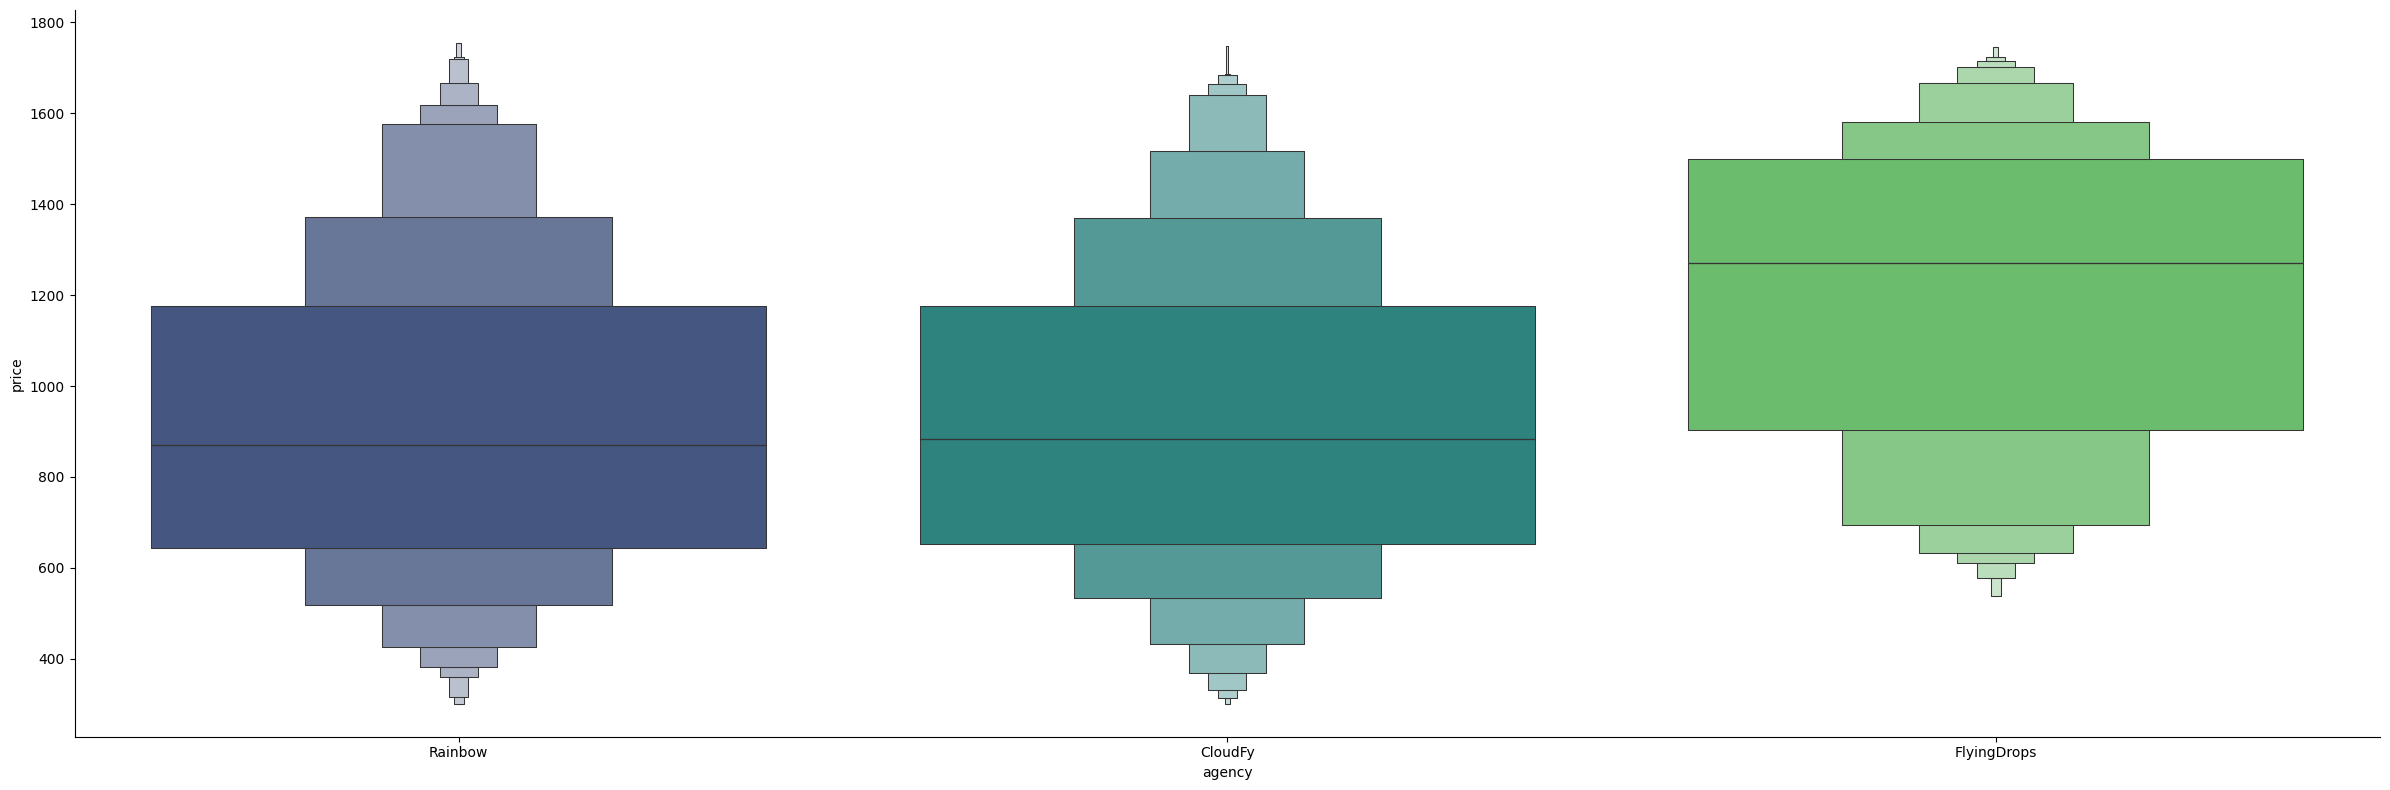

In [57]:
# Chart - 1 visualization

sns.catplot(y = "price", x = "agency", data = flights_df.sort_values("price", ascending = False), kind="boxen", height = 8, aspect = 3,hue='agency',palette="viridis")
plt.show()

##### 1. Why did you pick the specific chart?

*I created a catplot graph to analyze the price distribution across different agencies. This graph provides a comprehensive view of price variations among agencies, highlighting the median and visualizing price ranges. It helps us understand how ticket bookings are distributed across various price ranges.*

##### 2. What is/are the insight(s) found from the chart?

*After carefully analyzing the graph, I found that most people book tickets in the price range of $800 to $1200. However, the average price for tickets booked through the agency FlyingDrops is notably higher compared to the others. This observation suggests a need for further analysis to understand the reasons behind this pricing difference.*

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Impact:**

*The insights gained from the analysis can lead to a positive business impact in several ways:*

**Targeted Marketing:** *Understanding that most bookings occur in the $800 to $1200 price range allows for more targeted marketing and promotions within this range, potentially increasing bookings and revenue.*

**Agency Performance Analysis:** *Noting that FlyingDrops has a higher average price range can lead to a deeper understanding of what differentiates it from other agencies. This could be due to better service, more premium options, or a specific customer base. Leveraging these insights could help other agencies adjust their offerings or pricing strategies to capture a similar market.*

**Pricing Strategy Optimization:** *The data can be used to refine pricing strategies, ensuring that prices are competitive yet profitable. Understanding the price sensitivity of customers can also inform discount strategies or bundled offers.*

**Insights Leading to Negative Growth:**

*While the insights themselves are neutral, their application could lead to negative growth if misinterpreted or mishandled. For example:*

**Overpricing:** *If FlyingDrops higher prices are due to factors not related to customer preference (e.g., hidden fees, lack of alternatives), and other agencies increase prices to match without providing additional value, it could lead to a loss of customers to competitors or a decrease in overall bookings*.

**Misalignment with Customer Expectations:** *If marketing efforts focus too heavily on the higher price range, they might alienate cost-sensitive customers or those looking for budget options, potentially reducing market share.*

**Ignoring Underlying Factors:** *If the higher average prices at FlyingDrops are due to specific routes or peak travel times and these factors are not addressed or understood, applying a blanket strategy based on this data could lead to ineffective or counterproductive outcomes.*

#### Chart - 2 Pie chart

In [58]:
agency_counts = flights_df['agency'].value_counts()

In [59]:
agency_counts

agency
Rainbow        116752
CloudFy        116378
FlyingDrops     38758
Name: count, dtype: int64

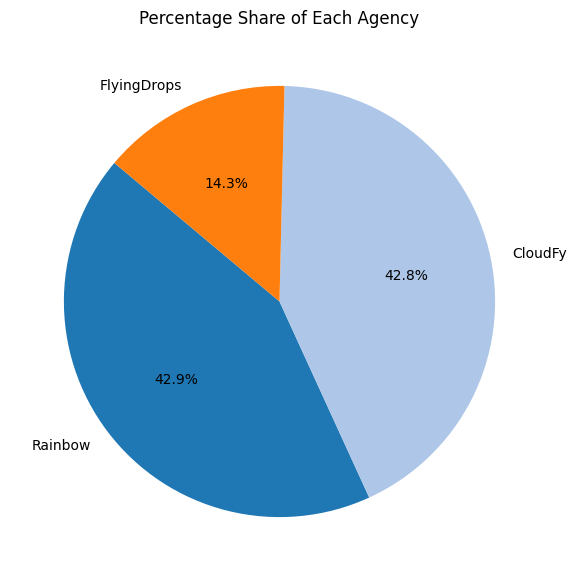

In [60]:
# Chart - 2 visualization code
plt.figure(figsize=(10, 7))
plt.pie(agency_counts, labels=agency_counts.index,autopct='%1.1f%%',  startangle=140,colors=plt.get_cmap('tab20').colors)
plt.title('Percentage Share of Each Agency')
plt.show()

##### 1. Why did you pick the specific chart?

*I used a pie chart to display the market share distribution of each agency. A pie chart offers a clear visualization for comparing and understanding the proportion of market share held by each category or component.*

##### 2. What is/are the insight(s) found from the chart?

*The chart reveals that Rainbow Agency holds the largest market share at around 42.9%, closely followed by Cloudy at 42.8%. FlyingDrops has the smallest market share at 14.3%. However, despite its lower market share, FlyingDrops has a higher average ticket price compared to the other agencies.*

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Impact:**

**Pricing and Revenue Optimization:** *Understanding that FlyingDrops, despite having a smaller market share, commands higher average ticket prices, suggests that there might be a segment of customers willing to pay more for certain services or routes. This insight can help businesses optimize pricing strategies to maximize revenue.*

**Market Positioning:** *The data showing Rainbow and Cloudy Agencies' significant market shares highlights their strong market presence. Businesses can leverage this information to strengthen partnerships, improve service offerings, or tailor marketing campaigns to consolidate their positions.*

**Strategic Growth Opportunities:** *Identifying the potential in different market segments allows agencies to tailor their strategies, such as expanding service offerings or improving customer experiences, to capture a larger market share or increase profitability.*

**Insights Leading to Negative Growth:**

**Overpricing Risks:** *If agencies misinterpret the higher prices at FlyingDrops as a market norm rather than a unique value proposition, they may raise prices across the board without adding corresponding value. This could alienate price-sensitive customers, leading to a decrease in bookings.*

**Neglecting Smaller Segments:** *Focusing solely on larger market players like Rainbow and Cloudy could lead to neglecting smaller yet profitable segments. If agencies ignore niche markets or specialized services, they might miss opportunities for growth and diversification.*

**Misalignment of Services:** *If agencies attempt to emulate FlyingDrops' pricing strategy without understanding the specific reasons behind its higher prices (such as premium services, exclusive routes, etc.), they might misalign their services with customer expectations, leading to dissatisfaction and reduced customer loyalty.*

#### Chart - 4 Box plot

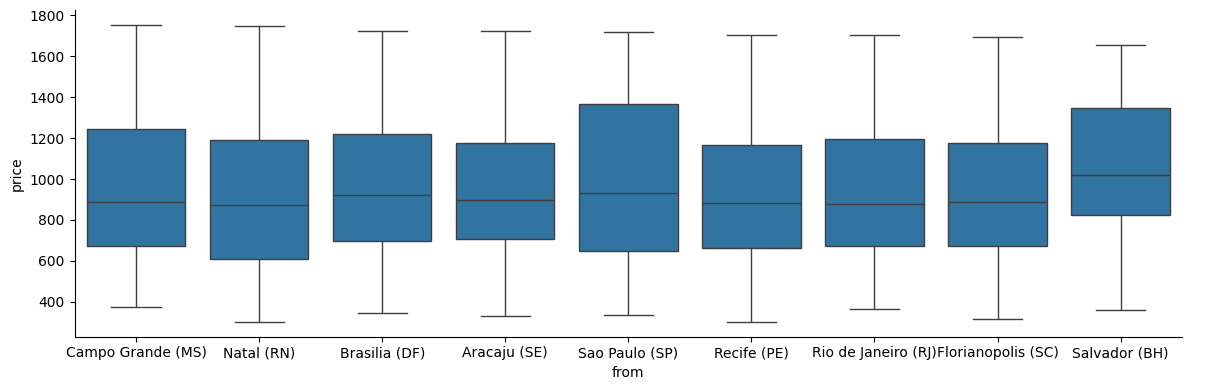

In [61]:
# Chart - 4 visualization code
sns.catplot(y = "price", x = "from", data = flights_df.sort_values("price", ascending = False), kind="box", height = 4, aspect = 3)
plt.show()

##### 1. Why did you pick the specific chart?

*I used a box plot to show the price distribution of flights from different airports. This visualization effectively illustrates the range and spread of flight ticket prices.*

##### 2. What is/are the insight(s) found from the chart?

*The analysis of the price distribution based on the 'from' column reveals that most flights are typically priced between $800 and $1200. However, tickets from Salvador are slightly higher, with a median price around $1100. In contrast, São Paulo shows a wider price spread, indicating either a higher volume of flights or greater price fluctuations from this airport.*

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Impact:**

**Pricing Strategy Refinement:** *Knowing that most flights are priced between $800 and $1200 allows for more strategic pricing. Agencies can optimize their pricing models to capture the bulk of the market within this range while adjusting prices from Salvador to reflect its higher median.*

**Focused Marketing Campaigns:** *Targeting campaigns can be designed to cater to specific airports. For instance, highlighting deals or promotions from São Paulo can attract more travelers if there is high traffic and price fluctuation.*

**Resource Allocation**: *Insights into higher prices from Salvador and the wider spread from São Paulo can help in better resource allocation. Agencies can ensure that they provide adequate services and support at these airports to enhance customer satisfaction and capitalize on the pricing trends.*

**Insights Leading to Negative Growth:**

**Mispricing Risks:** *Overgeneralizing the price insights might lead to mispricing. For example, increasing prices at other airports to match Salvadors higher median without adding value could drive customers away.*

**Ignoring Specific Market Needs:** *If the focus is solely on average price ranges, agencies might overlook the specific needs and behaviors of travelers from different airports. This could result in a one-size-fits-all approach that doesn’t cater to unique market segments, reducing customer satisfaction.*

**Price Sensitivity:** *If agencies assume that the wider price spread from São Paulo indicates willingness to pay higher prices without understanding underlying factors (e.g., demand variability, economic conditions), they might set prices too high, causing a drop in bookings.*

#### Chart - 5

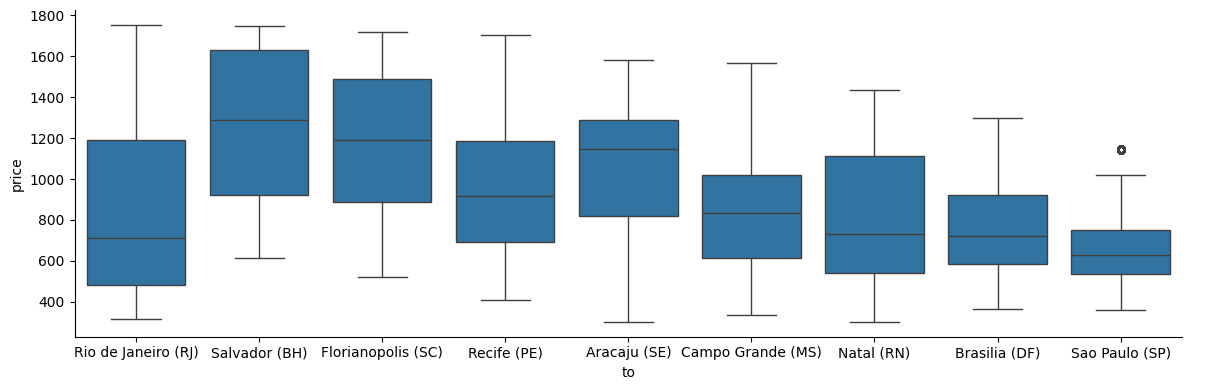

In [62]:
# Chart - 5 visualization code
sns.catplot(y = "price", x = "to", data = flights_df.sort_values("price", ascending = False), kind="box", height = 4, aspect = 3)
plt.show()

##### 1. Why did you pick the specific chart?

*I used a box plot to analyze the price distribution across different destination airports. This visualization helps us understand the spread of ticket prices and highlights the median price for each airport.*

##### 2. What is/are the insight(s) found from the chart?

*The box plot clearly shows that ticket prices vary across different destination airports. Salvador stands out with higher ticket prices, having a median around $1300 and reaching up to $1800, possibly due to high demand or limited flight availability. Conversely, São Paulo has a narrower price spread, with most ticket prices ranging between $600 and $800, which could be attributed to lower demand or a greater number of flight options.*

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Impact:**

**Demand-Driven Pricing:** *Understanding that Salvador has higher ticket prices due to potential high demand or limited flights allows for dynamic pricing strategies. Agencies can adjust prices based on demand, optimizing revenue while ensuring flights to high-demand destinations are profitable.*

**Service Expansion:** *Identifying the high demand for Salvador could justify increasing the number of flights or improving services to this destination. This can enhance customer satisfaction and capture more market share.*

**Market Segmentation:** *The data on Sao Paulos lower price range can help tailor marketing efforts to price-sensitive travelers or promote more competitive pricing strategies to attract budget-conscious customers.*

**Insights Leading to Negative Growth:**

**Overpricing Risks:** *If agencies increase prices for destinations like Sao Paulo based on the insights from Salvador without considering demand elasticity, they might drive away cost-sensitive customers, leading to reduced bookings.*

**Misallocation of Resources:** *Overemphasizing high-demand destinations like Salvador might lead to neglecting other potentially profitable routes. This could result in missed opportunities and imbalanced resource allocation.*

**Customer Dissatisfaction:** *If price increases are perceived as unjustified or opportunistic, it could lead to customer dissatisfaction and damage the agency’s reputation, potentially causing a loss of customer loyalty and negative word-of-mouth.*

#### Chart - 6 pie chart

In [63]:
type_count=flights_df['flightType'].value_counts()

In [64]:
type_count

flightType
firstClass    116418
premium        78004
economic       77466
Name: count, dtype: int64

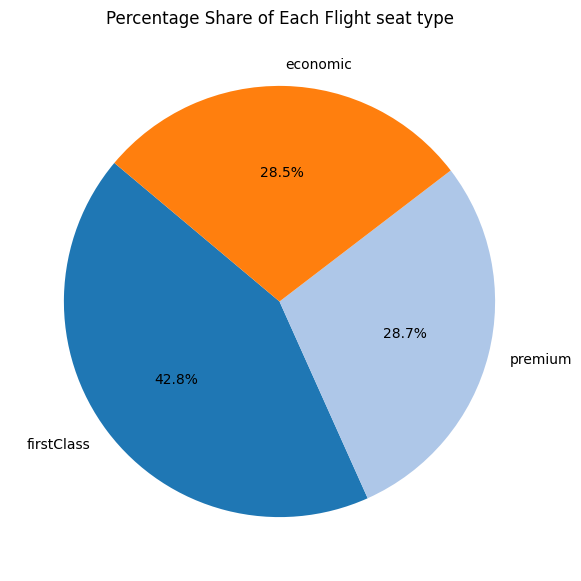

In [65]:
# Chart - 6 visualization code
plt.figure(figsize=(10, 7))
plt.pie(type_count, labels=type_count.index,autopct='%1.1f%%',  startangle=140,colors=plt.get_cmap('tab20').colors)
plt.title('Percentage Share of Each Flight seat type')
plt.show()

##### 1. Why did you pick the specific chart?

*I used a pie chart to display the percentage share of different flight types. This chart provides a clear and comprehensive visualization of the proportion each flight type represents within the overall dataset.*

##### 2. What is/are the insight(s) found from the chart?

*The pie chart reveals that the dataset includes three flight types: first class, premium, and economy. The highest percentage share is first class at around 42%, followed by premium at 28.7%, and economy at 28.5%. This insight indicates a preference for first class tickets among travelers.*

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Impact:**

**Premium Service Focus:** *Knowing that first class has the highest share suggests a strong market for premium services. Agencies can capitalize on this by enhancing their first-class offerings, promoting luxury features, and targeting marketing efforts to affluent travelers.*

**Revenue Optimization:** *Emphasizing first class, which typically generates higher revenue per ticket, can boost overall profitability. Agencies can structure pricing strategies and flight schedules to maximize the availability and appeal of first-class options.*

**Customer Segmentation:** *The insights allow for better customer segmentation. By understanding the distribution of preferences, agencies can tailor their services and communications to different segments, improving customer satisfaction and loyalty.*

**Insights Leading to Negative Growth:**

**Overinvestment in Premium Services:** *Focusing too heavily on first-class services at the expense of economy and premium options might alienate cost-conscious travelers, potentially reducing the overall customer base.*

**Mispricing Risk:** *Assuming a uniform preference for first class could lead to price hikes across the board. If not carefully managed, this might price out a significant portion of travelers who prefer economy or premium options, leading to a drop in bookings.*

**Ignoring Economic Fluctuations:** *The current preference for first class might change with economic conditions. If agencies invest heavily based on current data without considering potential market shifts, they could face reduced demand during economic downturns.*

#### Chart - 7 Box Plot

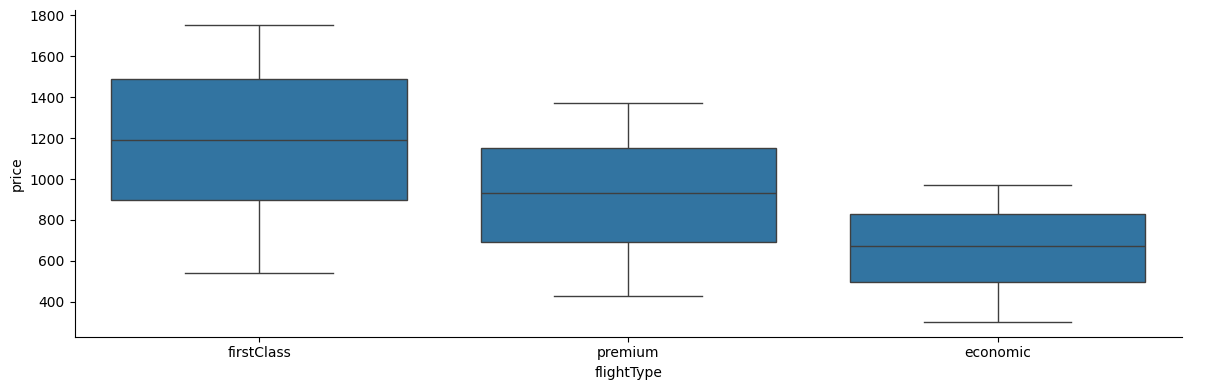

In [66]:
# Chart - 7 visualization code
sns.catplot(y = "price", x = "flightType", data = flights_df.sort_values("price", ascending = False), kind="box", height = 4, aspect = 3)
plt.show()

##### 1. Why did you pick the specific chart?

*I used a box plot to analyze and compare prices across different flight types. This visualization provides a detailed comparison of price distributions both between and within each flight type.*

##### 2. What is/are the insight(s) found from the chart?

*The box plot reveals distinct price ranges for each flight type. First class has the highest prices, ranging from \$600 to \$1800, with a median price around \$1200. Premium flights range from \$500 to \$1400, with a median of \$900. Economy flights, the least expensive, range from \$300 to \$1000, with a median of \$700. This price analysis enhances our understanding of customer behavior and spending patterns on flight bookings.*

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Impact:**

**Targeted Marketing and Promotions:** *Understanding the price ranges and median prices for each flight type allows for more effective marketing strategies. Agencies can tailor promotions and advertising to highlight the value of each flight type, targeting customers based on their spending patterns.*

**Revenue Management:** *The insights help in optimizing pricing strategies. Knowing that first-class tickets command the highest prices, agencies can adjust inventory and pricing dynamically to maximize revenue, especially during peak travel times.*

**Customer Segmentation:** *The analysis provides a clear picture of how different customer segments are spending on flights. This enables agencies to offer personalized services and packages that cater to the needs and preferences of each segment, improving customer satisfaction and loyalty.*

**Insights Leading to Negative Growth**:

**Overemphasis on High-Priced Tickets:** *If agencies focus too heavily on promoting first-class and premium tickets, they may neglect the economy segment, which could lead to a decline in overall bookings from cost-sensitive travelers.*

**Price Sensitivity:** *Raising prices across the board based on the high median prices in first class and premium categories could alienate budget-conscious customers. This might result in a decrease in bookings and a potential loss of market share to competitors.*

**Ignoring Market Fluctuations:** *The current price analysis might not account for seasonal variations or economic downturns. If agencies base their strategies solely on these insights without considering market changes, they might face challenges in maintaining profitability during low-demand periods.*

#### Chart - 8 Distplot

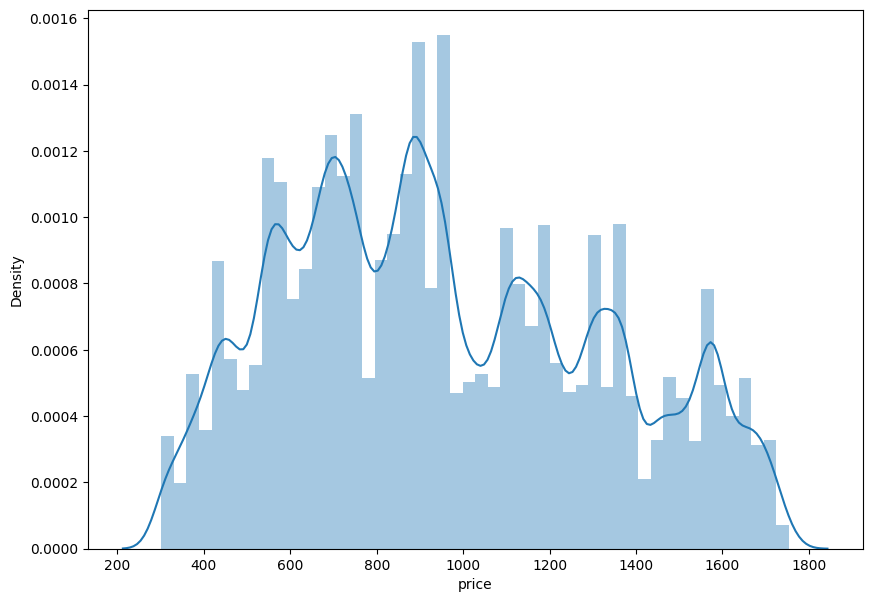

In [67]:
# Chart - 8 visualization code
plt.figure(figsize=(10, 7))
sns.distplot(flights_df['price'])
plt.show()

##### 1. Why did you pick the specific chart?

*I used a distplot to showcase the price distributions and density. This provides a comprehensive view of how prices are distributed across the dataset.*

##### 2. What is/are the insight(s) found from the chart?

*The distplot provides insights into price distribution, revealing that most people book flight tickets priced between $600 and $900. This helps us understand typical spending patterns on flight bookings.*

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Impact:**

**Pricing Strategy Optimization:** *Knowing that most bookings fall between $600 and $900 allows airlines to optimize their pricing strategies to target this range, potentially increasing bookings and revenue.*

**Targeted Promotions:** *Marketing campaigns can focus on the $600 to $900 price range, offering promotions and discounts within this range to attract more customers.*

**Inventory Management:** *Airlines can better manage their inventory by ensuring that a significant number of tickets are available within the $600 to $900 range, aligning with customer spending habits.*

**Customer Insights:** *Understanding customer spending patterns helps airlines tailor their services and packages to meet customer expectations, enhancing satisfaction and loyalty.*

**Insights Leading to Negative Growth:**

**Overemphasis on Mid-Range Pricing:** *Focusing too heavily on the $600 to $900 price range might lead to neglecting other customer segments, such as those willing to pay more for premium services or those looking for budget options. This could result in a loss of potential revenue from these segments*.

**Price Rigidity:** *If airlines become too rigid in their pricing strategies based on this data, they may miss opportunities to adjust prices dynamically in response to market fluctuations, potentially leading to reduced competitiveness and decreased bookings.*

**Ignoring External Factors:** *The current spending patterns might be influenced by specific market conditions or seasonal trends. If airlines base their long-term strategies solely on these insights without considering broader market dynamics, they might face challenges in adapting to changes in customer behavior or economic conditions.*

#### Chart - 9 Distplot

In [68]:
flights_df.head()

travelCode  userCode                from                  to  flightType  \
0           0         0         Recife (PE)  Florianopolis (SC)  firstClass   
1           0         0  Florianopolis (SC)         Recife (PE)  firstClass   
2           1         0       Brasilia (DF)  Florianopolis (SC)  firstClass   
3           1         0  Florianopolis (SC)       Brasilia (DF)  firstClass   
4           2         0        Aracaju (SE)       Salvador (BH)  firstClass   

     price  time  distance       agency       date  \
0  1434.38  1.76    676.53  FlyingDrops 2019-09-26   
1  1292.29  1.76    676.53  FlyingDrops 2019-09-30   
2  1487.52  1.66    637.56      CloudFy 2019-10-03   
3  1127.36  1.66    637.56      CloudFy 2019-10-04   
4  1684.05  2.16    830.86      CloudFy 2019-10-10   

                              route  total_time  weekday_num  month  year  \
0    Recife (PE)-Florianopolis (SC)         136            3      9  2019   
1    Florianopolis (SC)-Recife (PE)         136            0      9  2019   
2  Brasilia (DF)-Florianopolis (SC)         125            3     10  2019   
3  Florianopolis (SC)-Brasilia (DF)         125            4     10  2019   
4        Aracaju (SE)-Salvador (BH)         136            3     10  2019   

    weekday       speed  
0  Thursday  298.469118  
1    Monday  298.469118  
2  Thursday  306.028800  
3    Friday  306.028800  
4  Thursday  366.555882

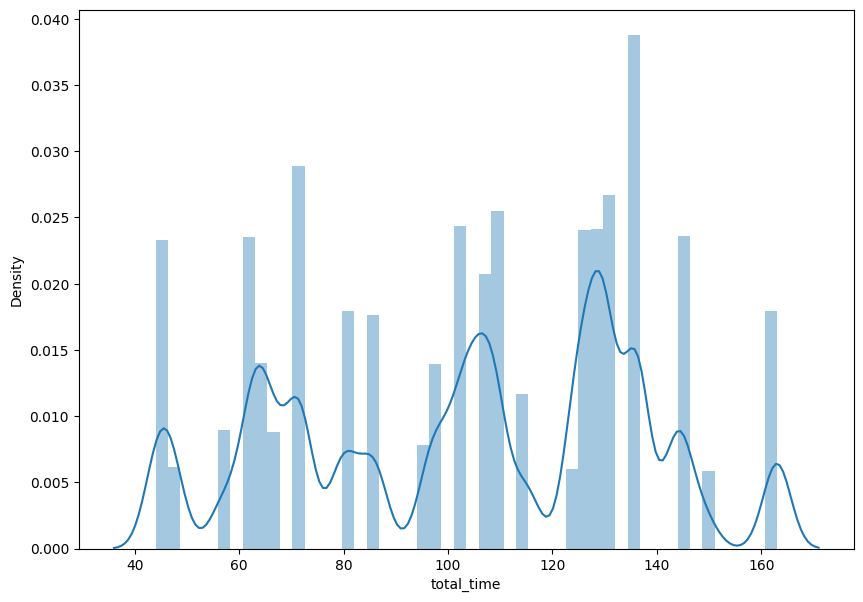

In [69]:
# Chart - 9 visualization code
plt.figure(figsize=(10, 7))
sns.distplot(flights_df['total_time'])
plt.show()

##### 1. Why did you pick the specific chart?

*I used a distplot to visualize the total flight time and its density within the dataset. This provides a clear view of the distribution of total flight times and their density.*

##### 2. What is/are the insight(s) found from the chart?

*The visualization reveals that flight times in the dataset are approximately normally distributed. It shows that while people take both short and long flights, longer flights (over 120 minutes) are more frequent than shorter ones.*

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Impact:**

**Service Optimization:** *Understanding that longer flights (over 120 minutes) are more frequent can help airlines optimize their services, such as providing additional amenities, catering, and in-flight entertainment, to enhance the customer experience for longer journeys.*

**Flight Scheduling:** *Airlines can use this insight to better schedule flights and allocate resources. Knowing that longer flights are more common can lead to more efficient use of aircraft and crew, improving operational efficiency.*

**Targeted Marketing:** *With the knowledge that longer flights are more frequent, airlines can tailor their marketing efforts to emphasize the value and comfort of their long-haul services, potentially attracting more customers for these flights.*

**Insights Leading to Negative Growth:**

**Overlooking Short Flights:** *Focusing solely on longer flights might lead to neglecting the needs of customers who prefer shorter trips. This could result in reduced satisfaction and lost revenue from the short-haul market.*

**Resource Allocation:** *If airlines overinvest in services or amenities for longer flights at the expense of short-haul flights, they might face inefficiencies or customer dissatisfaction in their short-haul services.*

**Price Adjustments:** *If the focus shifts disproportionately toward long-haul flights based on their frequency, there might be pressure to adjust pricing strategies that could alienate budget-conscious customers who prefer shorter, less expensive flights.*

#### Chart - 10 Bar chart

In [70]:
flights_df['distance'].max()

937.77

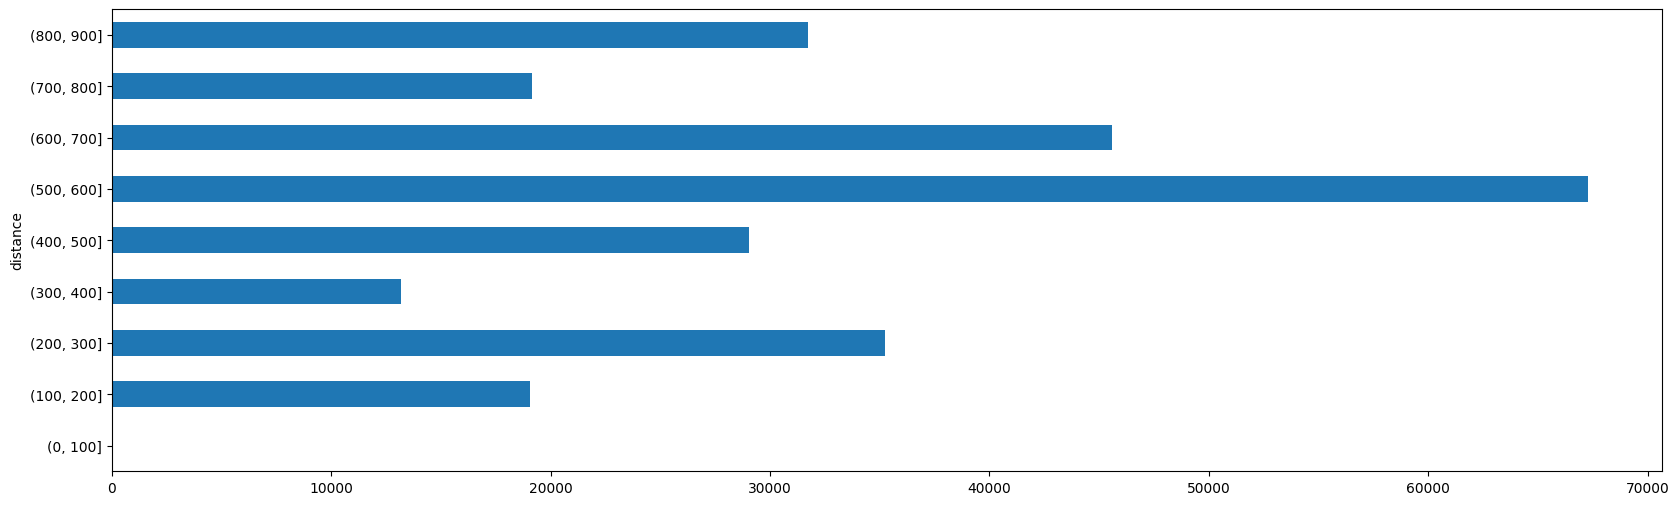

In [71]:
flights_df.distance.groupby(pd.cut(flights_df.distance, np.arange(0,1000,100))).count().plot(kind='barh',figsize = (20,6))
plt.show()

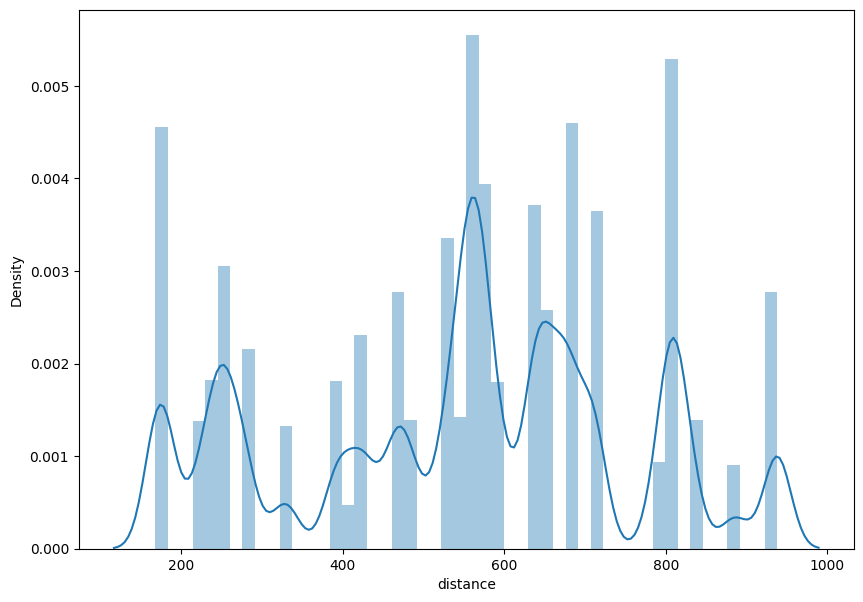

In [72]:
# Chart - 10 visualization code
plt.figure(figsize=(10, 7))
sns.distplot(flights_df['distance'])
plt.show()

##### 1. Why did you pick the specific chart?

*I used a bar chart and distplot to display the flight distances and their distribution. This provides insights into how frequently flights occur at various distance ranges.*

##### 2. What is/are the insight(s) found from the chart?

*The bar chart indicates that flights in the dataset cover distances ranging from 100 to 900 miles (or kilometers). Most flights are between 500 and 700 miles, while the fewest are in the 300 to 400-mile range. This insight is also reflected in the distplot, which shows that the highest density of flights occurs within the 500 to 700-mile distance range.*

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Impact:**

**Route Optimization:** *Understanding that most flights fall within the 500 to 700-mile range can help airlines optimize their route networks and schedules to focus on high-demand distances. This can improve operational efficiency and increase profitability.*

**Targeted Marketing:** *Airlines can tailor marketing strategies to emphasize their most frequently flown routes, potentially increasing bookings and customer engagement for these distances.*

**Resource Allocation:** *Knowing the common flight distances allows airlines to allocate resources more effectively, such as customizing aircraft configurations and crew assignments to suit the predominant flight lengths.*

**Insights Leading to Negative Growth:**

**Neglecting Other Routes:** *A focus solely on the 500 to 700-mile range might lead to the neglect of shorter or longer routes. This could result in missed opportunities and reduced revenue from other potential markets.*

**Overcapacity Risks:** *If airlines overemphasize flights within the 500 to 700-mile range, there is a risk of overcapacity on these routes, which could lead to reduced profitability due to increased competition or lower ticket prices.*

**Misaligned Service Offerings:** *If airlines adjust their service offerings based on the most common flight distances, they might not cater effectively to customers who prefer shorter or longer flights, potentially reducing customer satisfaction and loyalty.*

#### Chart - 11 Scatter Plot

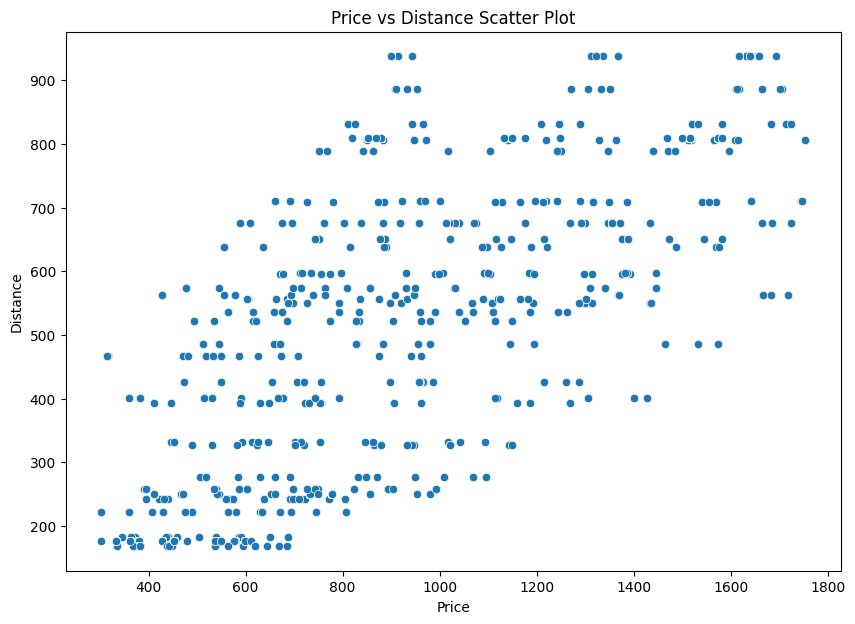

In [73]:
# Chart - 11 visualization code
# Create a scatter plot
plt.figure(figsize=(10, 7))
sns.scatterplot(x="price", y="distance", data=flights_df)
plt.xlabel("Price")
plt.ylabel("Distance")
plt.title("Price vs Distance Scatter Plot")
plt.show()

##### 1. Why did you pick the specific chart?

*I used a scatter plot to examine the correlation between price and distance. This visualization provides a comprehensive view of how these two variables are related.*

##### 2. What is/are the insight(s) found from the chart?

*The scatter plot reveals a positive correlation between price and distance, indicating that as the distance of a flight increases, the ticket price tends to rise. However, some shorter flights have higher prices, which may be due to factors such as ticket type or flight class, with 42% of flights being first class, as noted earlier.*

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Impact:**

**Pricing Strategy Optimization:** *Understanding the positive correlation between price and distance helps airlines refine their pricing strategies. Airlines can adjust prices based on distance to better align with customer expectations and maximize revenue.*

**Revenue Management:** *Insights into how distance affects ticket prices can assist in managing revenue by setting appropriate price points for different flight lengths, improving overall profitability.*

**Targeted Offers:** *Recognizing that some shorter flights have high prices, airlines can tailor their marketing and promotional offers to highlight the value of longer flights or offer competitive pricing on shorter flights to attract more customers.*

**Insights Leading to Negative Growth:**

**Price Sensitivity:** *If airlines overly focus on distance-based pricing without considering other factors, such as ticket type or customer preferences, they may alienate price-sensitive travelers, potentially reducing bookings.*

**Mispricing Risks:** *Shorter flights with higher prices due to ticket type or class could lead to perceived unfair pricing. If not managed well, this could result in customer dissatisfaction and lost revenue from potential customers seeking better value.*

**Market Overemphasis:** *A focus on distance-based pricing might lead to neglecting other important factors, such as flight quality or customer service, which can affect overall customer satisfaction and loyalty.*

#### Chart - 12 Bar chart

In [74]:
flights_df.head()

travelCode  userCode                from                  to  flightType  \
0           0         0         Recife (PE)  Florianopolis (SC)  firstClass   
1           0         0  Florianopolis (SC)         Recife (PE)  firstClass   
2           1         0       Brasilia (DF)  Florianopolis (SC)  firstClass   
3           1         0  Florianopolis (SC)       Brasilia (DF)  firstClass   
4           2         0        Aracaju (SE)       Salvador (BH)  firstClass   

     price  time  distance       agency       date  \
0  1434.38  1.76    676.53  FlyingDrops 2019-09-26   
1  1292.29  1.76    676.53  FlyingDrops 2019-09-30   
2  1487.52  1.66    637.56      CloudFy 2019-10-03   
3  1127.36  1.66    637.56      CloudFy 2019-10-04   
4  1684.05  2.16    830.86      CloudFy 2019-10-10   

                              route  total_time  weekday_num  month  year  \
0    Recife (PE)-Florianopolis (SC)         136            3      9  2019   
1    Florianopolis (SC)-Recife (PE)         136            0      9  2019   
2  Brasilia (DF)-Florianopolis (SC)         125            3     10  2019   
3  Florianopolis (SC)-Brasilia (DF)         125            4     10  2019   
4        Aracaju (SE)-Salvador (BH)         136            3     10  2019   

    weekday       speed  
0  Thursday  298.469118  
1    Monday  298.469118  
2  Thursday  306.028800  
3    Friday  306.028800  
4  Thursday  366.555882

In [75]:
flights_df.head()

travelCode  userCode                from                  to  flightType  \
0           0         0         Recife (PE)  Florianopolis (SC)  firstClass   
1           0         0  Florianopolis (SC)         Recife (PE)  firstClass   
2           1         0       Brasilia (DF)  Florianopolis (SC)  firstClass   
3           1         0  Florianopolis (SC)       Brasilia (DF)  firstClass   
4           2         0        Aracaju (SE)       Salvador (BH)  firstClass   

     price  time  distance       agency       date  \
0  1434.38  1.76    676.53  FlyingDrops 2019-09-26   
1  1292.29  1.76    676.53  FlyingDrops 2019-09-30   
2  1487.52  1.66    637.56      CloudFy 2019-10-03   
3  1127.36  1.66    637.56      CloudFy 2019-10-04   
4  1684.05  2.16    830.86      CloudFy 2019-10-10   

                              route  total_time  weekday_num  month  year  \
0    Recife (PE)-Florianopolis (SC)         136            3      9  2019   
1    Florianopolis (SC)-Recife (PE)         136            0      9  2019   
2  Brasilia (DF)-Florianopolis (SC)         125            3     10  2019   
3  Florianopolis (SC)-Brasilia (DF)         125            4     10  2019   
4        Aracaju (SE)-Salvador (BH)         136            3     10  2019   

    weekday       speed  
0  Thursday  298.469118  
1    Monday  298.469118  
2  Thursday  306.028800  
3    Friday  306.028800  
4  Thursday  366.555882

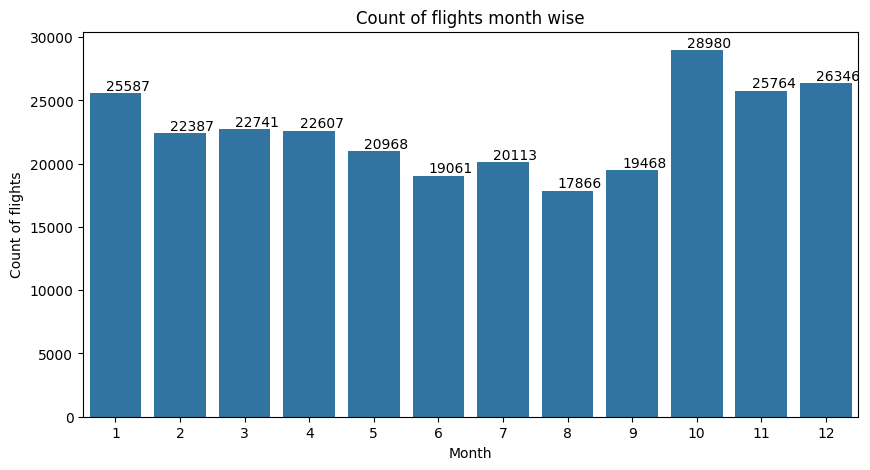

In [76]:
# Chart - 12 visualization code
plt.figure(figsize = (10, 5))
plt.title('Count of flights month wise')
ax=sns.countplot(x = 'month', data = flights_df)
plt.xlabel('Month')
plt.ylabel('Count of flights')
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom', color= 'black')
plt.show()

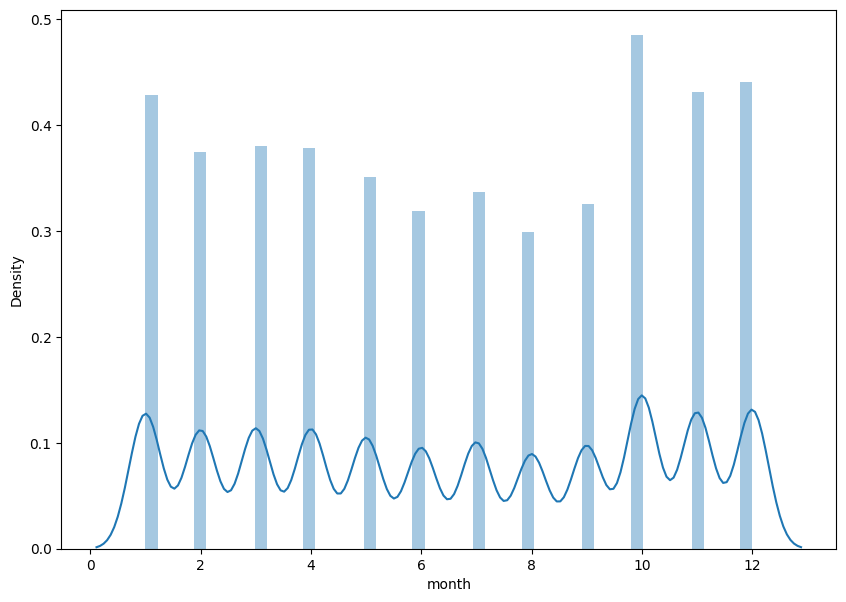

In [77]:
plt.figure(figsize=(10, 7))
sns.distplot(flights_df['month'])
plt.show()

##### 1. Why did you pick the specific chart?

*I used a bar chart to display the number of flights each month and the distplot to visualize the distribution the total flights over a month.*

##### 2. What is/are the insight(s) found from the chart?

*The bar chart reveals a clear trend in flight frequency over the months. It shows that flights are more frequent in October, November, and December, likely due to the festive season, while August has notably fewer flights.*

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


**Positive Business Impact:**

**Seasonal Planning:** *Recognizing the increased flight frequency in October, November, and December allows airlines to plan and allocate resources effectively for the busy festive season. This can help optimize staffing, manage capacity, and improve customer service during peak travel periods.*

**Targeted Marketing:** *The insight into higher flight activity during the last months of the year can be used to design targeted marketing campaigns and promotions. Airlines can capitalize on the festive season by offering special deals or incentives to attract more travelers.*

**Revenue Optimization:** *Understanding the seasonal trends can help airlines adjust pricing strategies dynamically. They can implement higher fares during peak months to maximize revenue and offer discounts during quieter periods like August to stimulate demand.*

**Insights Leading to Negative Growth:**

**Overlooking Low Season Demand:** *If airlines focus only on the busy months and ignore the lower demand in August, they may miss opportunities to attract more travelers during off-peak times. This could lead to underutilization of capacity and reduced revenue.*

**Resource Misallocation:** *Excessive focus on peak months might lead to overinvestment in resources for those periods, potentially causing inefficiencies and higher operational costs. Conversely, insufficient attention to quieter months could result in missed revenue opportunities.*

**Customer Perception:** *If pricing is adjusted based on peak season insights without considering customer sensitivity, it could lead to perceptions of unfair pricing or reduced customer satisfaction, particularly during off-peak times.*



#### Chart - 13 Distplot

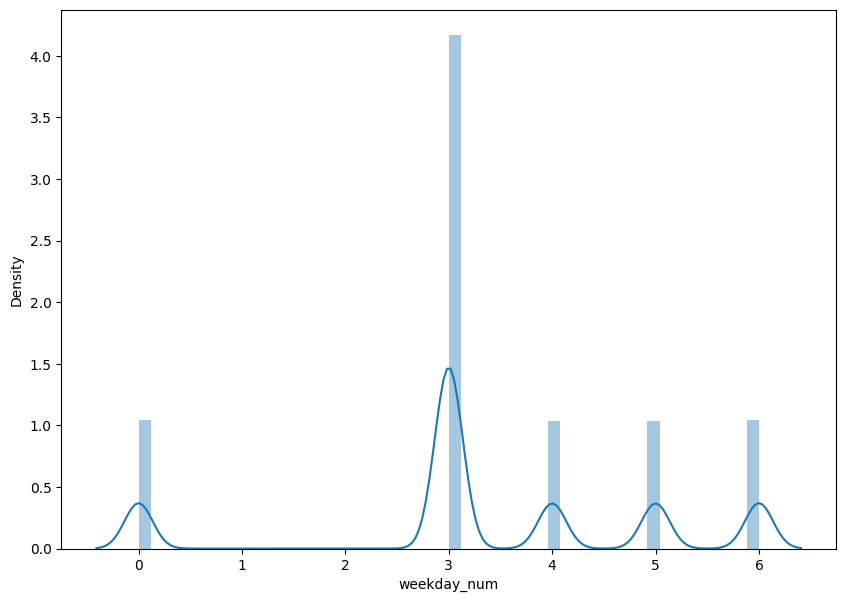

In [78]:
# Chart - 13 visualization code
plt.figure(figsize=(10, 7))
sns.distplot(flights_df['weekday_num'])
plt.show()

##### 1. Why did you pick the specific chart?

*I used a distplot to visualize the count of flights on different weekdays, providing a density distribution of flights throughout the week.*

##### 2. What is/are the insight(s) found from the chart?

*The distplot reveals that the majority of flights operate on Thursday, while there are no flights running on Tuesday and Wednesday.*

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Impact:**

**Optimized Scheduling:** *Understanding that most flights operate on Thursday can help airlines optimize their scheduling, ensuring adequate resources and staffing on high-demand days to improve efficiency and customer service.*

**Promotional Strategies:** *Airlines can use this insight to develop targeted promotional campaigns to boost bookings on low-demand days like Tuesday and Wednesday, potentially increasing overall flight utilization and revenue.*

**Resource Allocation:** *Airlines can allocate resources more effectively by concentrating on maintenance and training activities on days with fewer or no flights, thereby minimizing disruptions to operations.*

**Insights Leading to Negative Growth:**

**Capacity Imbalance:** *If airlines focus too heavily on Thursday operations without addressing the low activity on Tuesday and Wednesday, they may face capacity imbalances, leading to overcrowded flights on Thursdays and underutilized capacity on other days.*

**Customer Inconvenience:** *Limited flight options on Tuesday and Wednesday might inconvenience travelers who prefer to fly on those days, potentially driving them to choose competitors with more balanced schedules.*

**Missed Revenue Opportunities:** *By not offering flights on Tuesday and Wednesday, airlines might miss out on potential revenue from customers who need to travel on those days, leading to reduced overall profitability.*

#### Chart - 14 - Correlation Heatmap

In [79]:
columns_to_drop = ['time', 'date']
flights_df1 = flights_df.drop(columns=columns_to_drop)

In [80]:
flights_df1.head()

travelCode  userCode                from                  to  flightType  \
0           0         0         Recife (PE)  Florianopolis (SC)  firstClass   
1           0         0  Florianopolis (SC)         Recife (PE)  firstClass   
2           1         0       Brasilia (DF)  Florianopolis (SC)  firstClass   
3           1         0  Florianopolis (SC)       Brasilia (DF)  firstClass   
4           2         0        Aracaju (SE)       Salvador (BH)  firstClass   

     price  distance       agency                             route  \
0  1434.38    676.53  FlyingDrops    Recife (PE)-Florianopolis (SC)   
1  1292.29    676.53  FlyingDrops    Florianopolis (SC)-Recife (PE)   
2  1487.52    637.56      CloudFy  Brasilia (DF)-Florianopolis (SC)   
3  1127.36    637.56      CloudFy  Florianopolis (SC)-Brasilia (DF)   
4  1684.05    830.86      CloudFy        Aracaju (SE)-Salvador (BH)   

   total_time  weekday_num  month  year   weekday       speed  
0         136            3      9  2019  Thursday  298.469118  
1         136            0      9  2019    Monday  298.469118  
2         125            3     10  2019  Thursday  306.028800  
3         125            4     10  2019    Friday  306.028800  
4         136            3     10  2019  Thursday  366.555882

In [81]:
flights_df1.corr(numeric_only=True)


travelCode  userCode     price  distance  total_time  \
travelCode     1.000000  0.999894  0.135749  0.310703    0.340019   
userCode       0.999894  1.000000  0.137282  0.313996    0.343315   
price          0.135749  0.137282  1.000000  0.641915    0.631045   
distance       0.310703  0.313996  0.641915  1.000000    0.955154   
total_time     0.340019  0.343315  0.631045  0.955154    1.000000   
weekday_num   -0.000484 -0.000521  0.016060 -0.002558   -0.002438   
month          0.003233  0.003260 -0.000013  0.000942    0.001283   
year          -0.000528 -0.001322  0.007291  0.008011    0.008064   
speed          0.158926  0.161047  0.418726  0.709277    0.493377   

             weekday_num     month      year     speed  
travelCode     -0.000484  0.003233 -0.000528  0.158926  
userCode       -0.000521  0.003260 -0.001322  0.161047  
price           0.016060 -0.000013  0.007291  0.418726  
distance       -0.002558  0.000942  0.008011  0.709277  
total_time     -0.002438  0.001283  0.008064  0.493377  
weekday_num     1.000000 -0.005024  0.000952 -0.002153  
month          -0.005024  1.000000 -0.355074  0.000454  
year            0.000952 -0.355074  1.000000  0.005134  
speed          -0.002153  0.000454  0.005134  1.000000

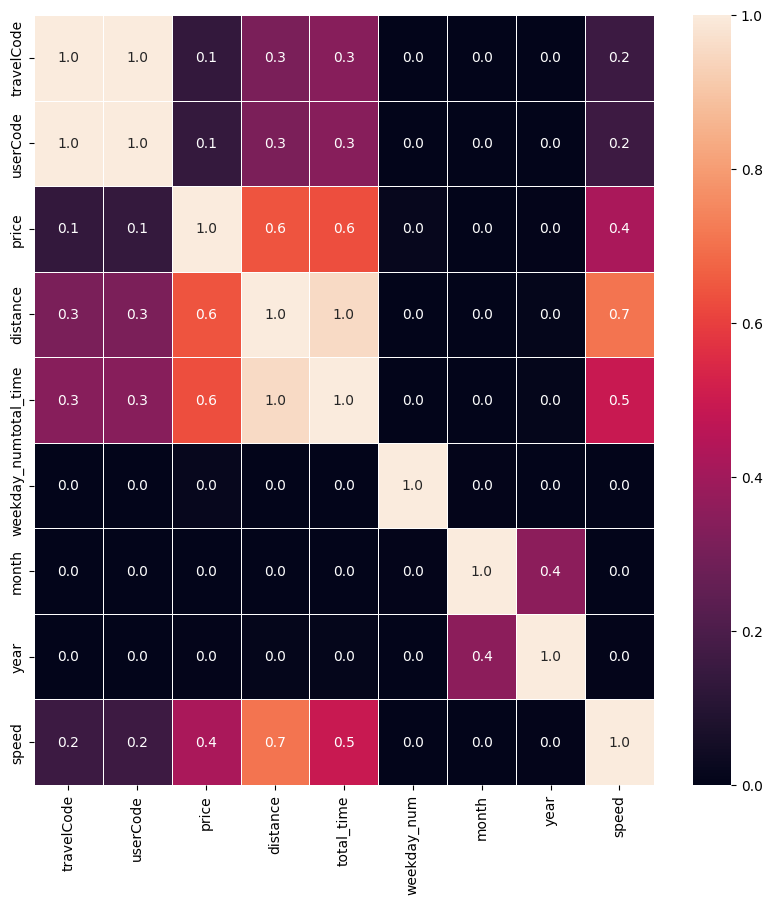

In [82]:
f,ax = plt.subplots(figsize=(10,10))
sns.heatmap(abs(round(flights_df1.corr(numeric_only=True),3)), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()


##### 1. Why did you pick the specific chart?

*I used a correlation heatmap for all variables to gain insights into their relationships and their impact on the target variable. The heatmap provides a comprehensive visualization with color coding and correlation values, making it easy to understand variable correlations and identify multicollinearity.*

##### 2. What is/are the insight(s) found from the chart?

*The heatmap reveals that our target variable, flight price, has a positive correlation with variables such as total time, distance, and speed. User code and flight code show only minor correlation. Additionally, distance and total time are highly correlated, indicating multicollinearity, meaning they provide similar information regarding the target variable.*

#### Chart - 15 - Pair Plot

<Figure size 1000x1000 with 0 Axes>

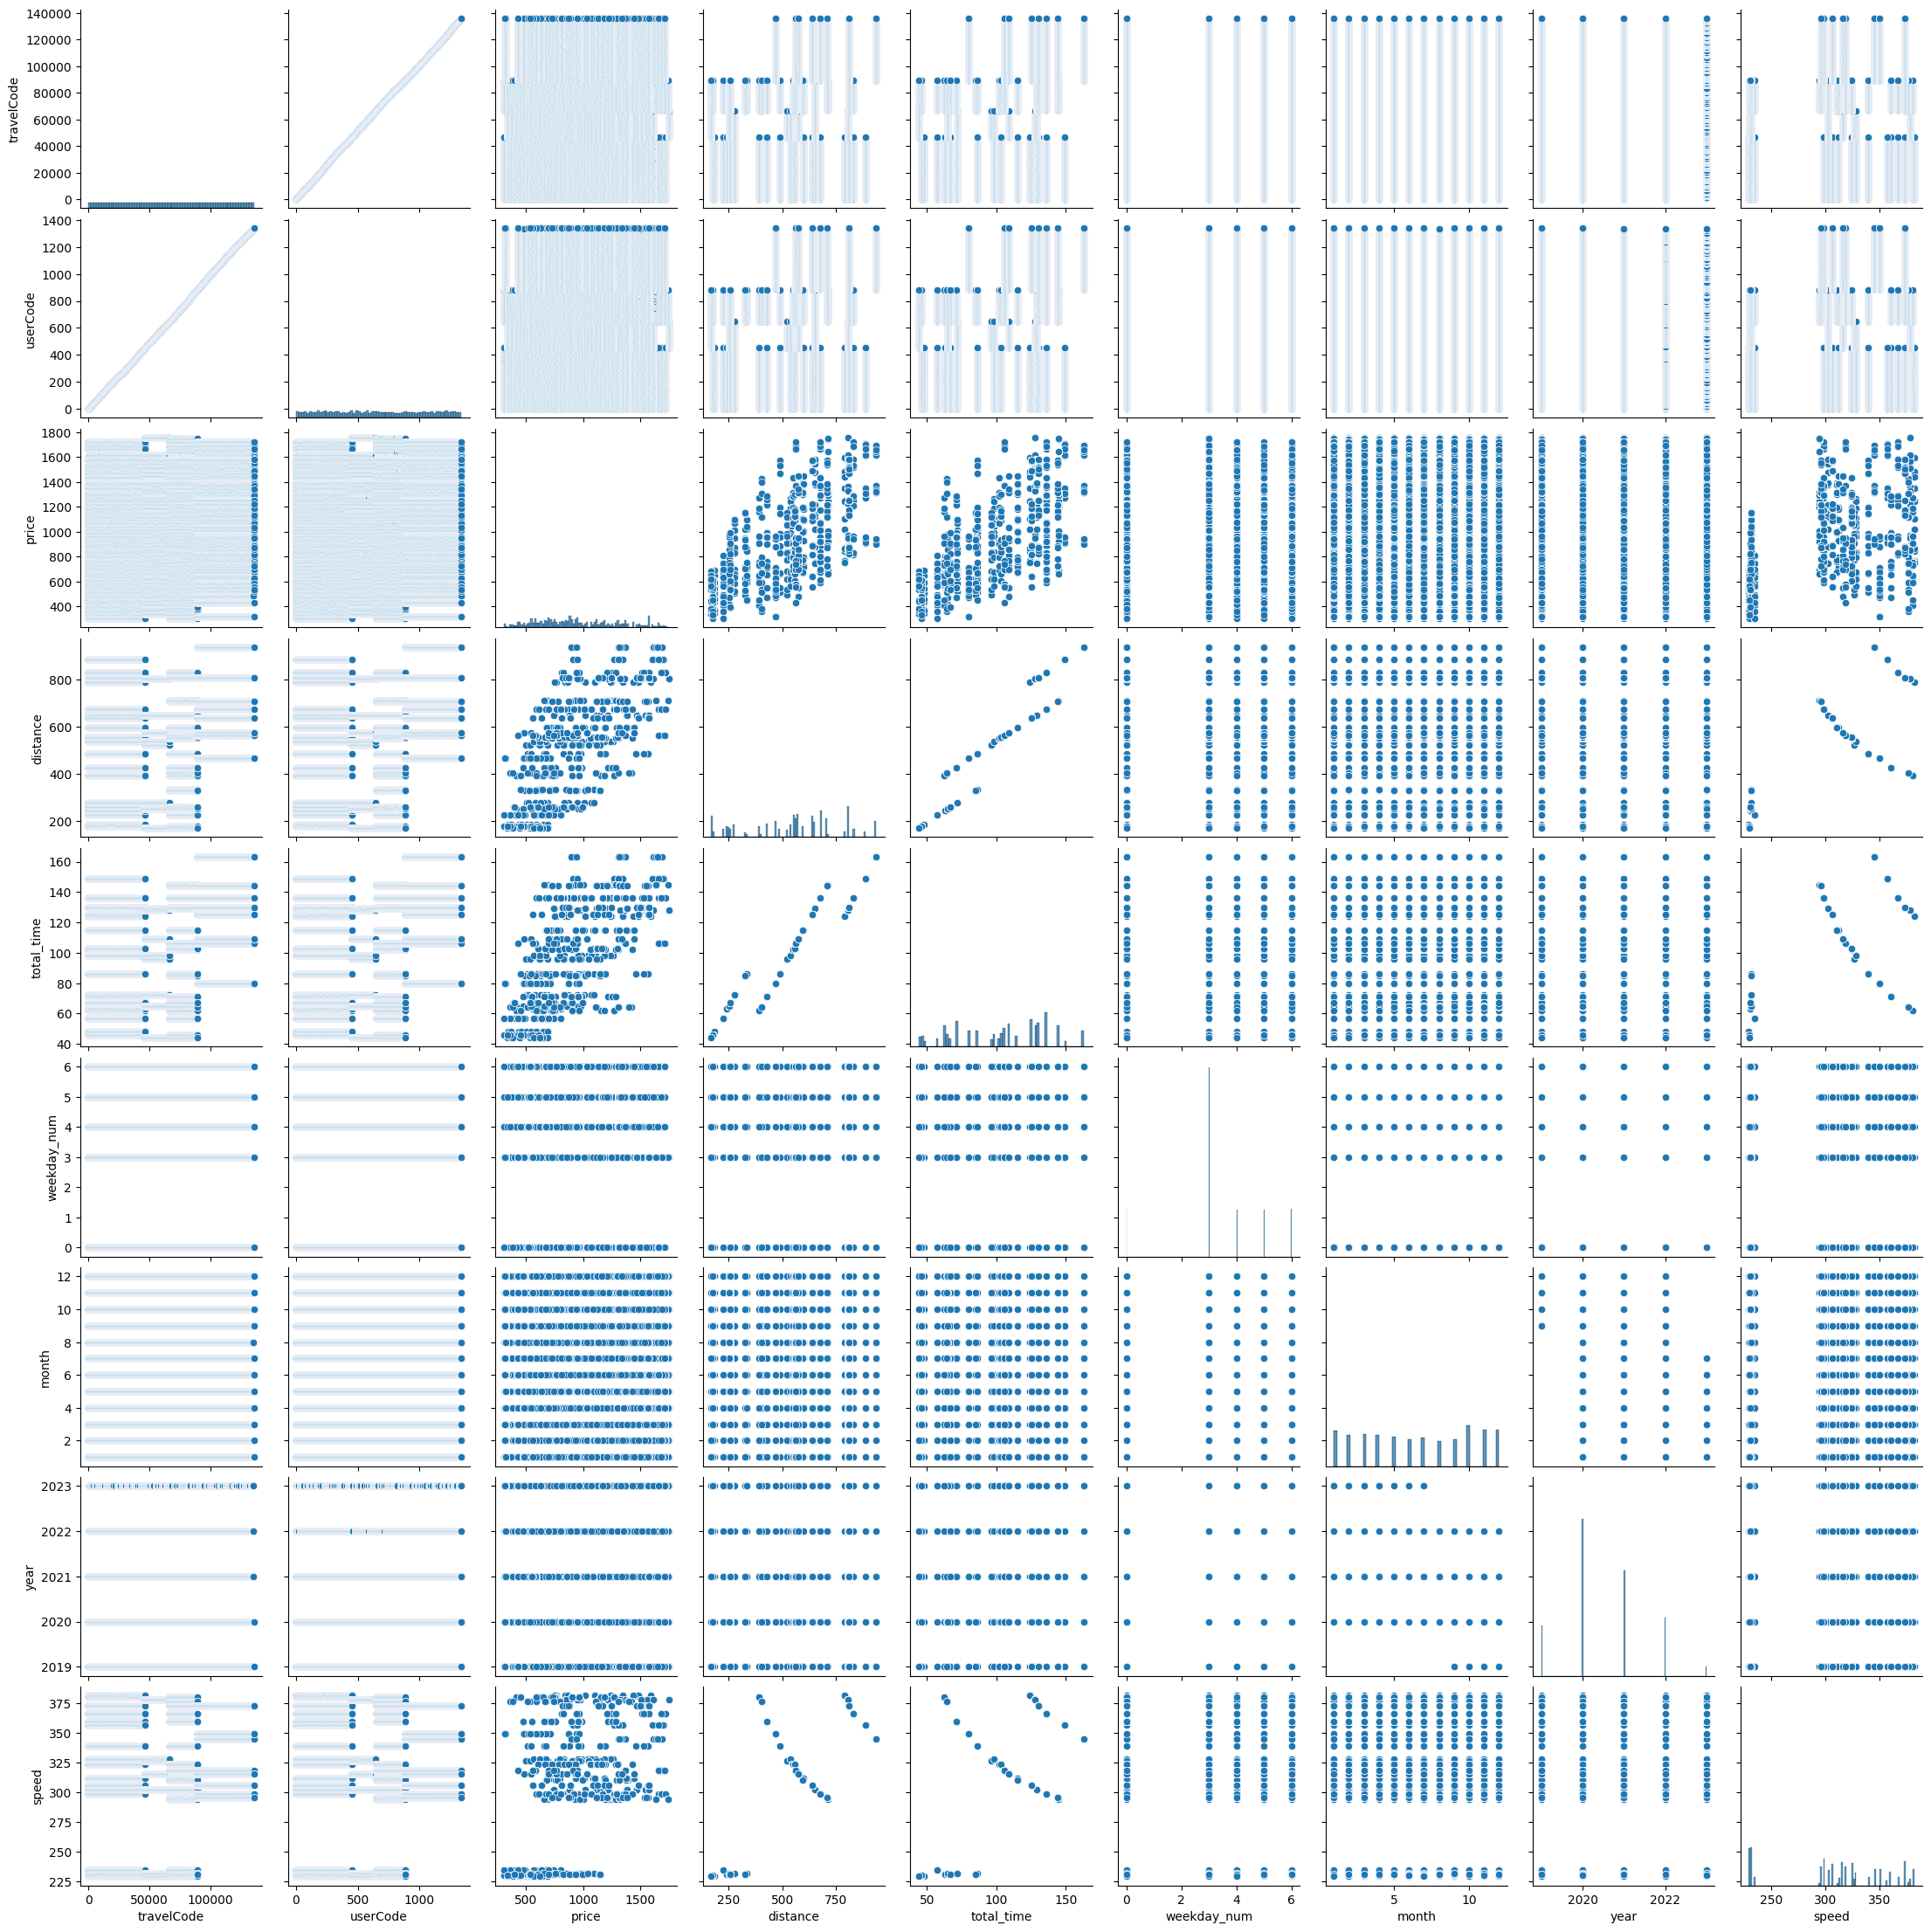

In [83]:
# Pair Plot visualization code
plt.figure(figsize=(10, 10))
sns.pairplot(flights_df1)
plt.show()

##### 1. Why did you pick the specific chart?

*I used a pairplot to analyze the relationships between variables. This visualization provides easy-to-understand insights into how each variable relates to the others.*

##### 2. What is/are the insight(s) found from the chart?

*Most variables in our dataset are discrete in nature. The pairplot reveals that speed and distance have a strong negative correlation, while time and distance show a positive correlation. Additionally, the pairplot provides insights into the skewness of the variables, showing that most of them are normally distributed.*

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Hypothetical Statement - 1 The average flight price is greater than $200.

Hypothetical Statement - 2 The average flight duration is different for flights above and below 600 km.

Hypothetical Statement - 3 correlation between flight price and distance

In [84]:
flights_df1.head()

travelCode  userCode                from                  to  flightType  \
0           0         0         Recife (PE)  Florianopolis (SC)  firstClass   
1           0         0  Florianopolis (SC)         Recife (PE)  firstClass   
2           1         0       Brasilia (DF)  Florianopolis (SC)  firstClass   
3           1         0  Florianopolis (SC)       Brasilia (DF)  firstClass   
4           2         0        Aracaju (SE)       Salvador (BH)  firstClass   

     price  distance       agency                             route  \
0  1434.38    676.53  FlyingDrops    Recife (PE)-Florianopolis (SC)   
1  1292.29    676.53  FlyingDrops    Florianopolis (SC)-Recife (PE)   
2  1487.52    637.56      CloudFy  Brasilia (DF)-Florianopolis (SC)   
3  1127.36    637.56      CloudFy  Florianopolis (SC)-Brasilia (DF)   
4  1684.05    830.86      CloudFy        Aracaju (SE)-Salvador (BH)   

   total_time  weekday_num  month  year   weekday       speed  
0         136            3      9  2019  Thursday  298.469118  
1         136            0      9  2019    Monday  298.469118  
2         125            3     10  2019  Thursday  306.028800  
3         125            4     10  2019    Friday  306.028800  
4         136            3     10  2019  Thursday  366.555882

### Hypothetical Statement - 1 The average flight price is greater than $200.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null Hypothesis (H0): The average flight price is less than or equal to $200.**

**Alternative Hypothesis (H1): The average flight price is greater than $200.**

#### 2. Perform an appropriate statistical test.

**One-sample t-test: Is the average flight price > $200?**

**Null Hypothesis (H0): μ <= 200**

**Alternative Hypothesis (H1): μ > 200**

In [85]:
# Perform Statistical Test to obtain P-Value

mu = 200
t_stat, p_value = stats.ttest_1samp(flights_df1['price'], mu)
print(f"T-statistic: {t_stat}, P-value: {p_value/2}")

if p_value/2 < 0.05:
    print("Reject the null hypothesis. The average flight price is greater than $200.")

T-statistic: 1089.992265506749, P-value: 0.0
Reject the null hypothesis. The average flight price is greater than $200.


##### Which statistical test have you done to obtain P-Value?

*The statistical test performed is a one-sample t-test, also known as a one-sample t-test or single-sample t-test.*

##### Why did you choose the specific statistical test?

*I chose to perform a one-sample t-test because it is specifically designed to compare the mean of a sample to a hypothesized value, which aligns with my goal of testing whether the average flight price exceeds $200.*

### Hypothetical Statement - 2 The average flight duration is different for flights above and below 600 km.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null Hypothesis (H0): The average flight duration is the same for flights above and below 600 km.**

**Alternative Hypothesis (H1): The average flight duration is different for flights above and below 600 km.**

#### 2. Perform an appropriate statistical test.

**Two-sample t-test: Is the average time different for flights above and below 600 km?**

**Null Hypothesis (H0): μ_above = μ_below**

**Alternative Hypothesis (H1): μ_above ≠ μ_below**

In [86]:
# Perform Statistical Test to obtain P-Value

above_600 = flights_df1[flights_df1['distance'] > 600]['total_time']
below_600 = flights_df1[flights_df1['distance'] <= 600]['total_time']

t_stat, p_value = stats.ttest_ind(above_600, below_600)
print(f"T-statistic: {t_stat}, P-value: {p_value}")

if p_value < 0.05:
    print("Reject the null hypothesis. The average flight duration is different for flights above and below 600 km.")

T-statistic: 752.0505562411363, P-value: 0.0
Reject the null hypothesis. The average flight duration is different for flights above and below 600 km.


##### Which statistical test have you done to obtain P-Value?

*I used a two-sample t-test to compare the time differences between flights with distances greater than 600 km and those with distances less than 600 km.*

##### Why did you choose the specific statistical test?

*I chose the two-sample t-test because it is designed to compare the means of two independent samples, which aligns with my hypothesis of comparing flight times for distances above and below 600 km.*

### Hypothetical Statement - 3 correlation between flight price and distance



#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null Hypothesis (H0): There is no correlation between flight price and distance (correlation coefficient = 0).**

**Alternative Hypothesis (H1): There is a correlation between flight price and distance (correlation coefficient ≠ 0).**

#### 2. Perform an appropriate statistical test.

**Pearson correlation test: Is there a correlation between price and distance?**

**Null Hypothesis (H0): ρ = 0**

**Alternative Hypothesis (H1): ρ ≠ 0**

In [87]:
# Perform Statistical Test to obtain P-Value

correlation, p_value = stats.pearsonr(flights_df1['price'], flights_df1['distance'])
print(f"Correlation: {correlation}, P-value: {p_value}")

if p_value < 0.05:
    print("Reject the null hypothesis. There is a correlation between flight price and distance.")

Correlation: 0.6419153216454506, P-value: 0.0
Reject the null hypothesis. There is a correlation between flight price and distance.


##### Which statistical test have you done to obtain P-Value?

*I used the Pearson correlation test to assess the correlation between price and distance, as part of testing the hypothesis regarding their relationship.*

##### Why did you choose the specific statistical test?

*I used the Pearson correlation test because it is designed to evaluate the relationship between two variables, which aligns with my goal of examining the correlation between price and distance.*

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [88]:
# Handling Missing Values & Missing Value Imputation
flights_df1.isnull().sum()

travelCode     0
userCode       0
from           0
to             0
flightType     0
price          0
distance       0
agency         0
route          0
total_time     0
weekday_num    0
month          0
year           0
weekday        0
speed          0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

*There are no null values in our dataset*

### 2. Handling Outliers

In [89]:
# Handling Outliers & Outlier treatments
flights_df1.describe()

travelCode       userCode         price       distance  \
count  271888.000000  271888.000000  271888.00000  271888.000000   
mean    67971.500000     667.505495     957.37503     546.955535   
std     39243.724665     389.523127     362.31189     208.851288   
min         0.000000       0.000000     301.51000     168.220000   
25%     33985.750000     326.000000     672.66000     401.660000   
50%     67971.500000     659.000000     904.00000     562.140000   
75%    101957.250000    1011.000000    1222.24000     676.530000   
max    135943.000000    1339.000000    1754.17000     937.770000   

          total_time    weekday_num          month           year  \
count  271888.000000  271888.000000  271888.000000  271888.000000   
mean      103.667701       3.373521       6.607519    2020.522862   
std        32.426429       1.655530       3.606611       0.980161   
min        44.000000       0.000000       1.000000    2019.000000   
25%        72.000000       3.000000       3.000000    2020.000000   
50%       106.000000       3.000000       7.000000    2020.000000   
75%       130.000000       4.000000      10.000000    2021.000000   
max       163.000000       6.000000      12.000000    2023.000000   

               speed  
count  271888.000000  
mean      309.101486  
std        48.348115  
min       229.212500  
25%       295.570833  
50%       315.858716  
75%       345.191411  
max       381.556452

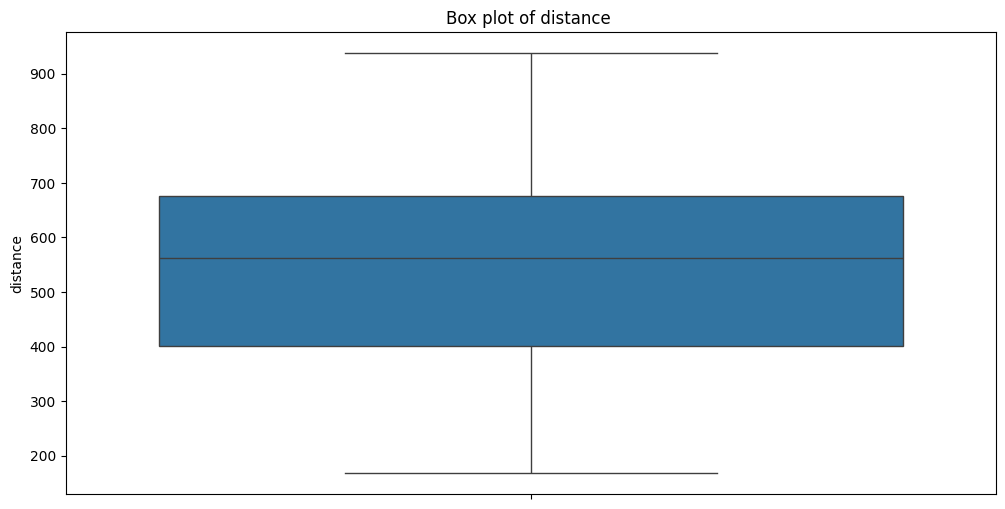

In [90]:
plt.figure(figsize=(12,6))
plt.title("Box plot of distance ")
ax = sns.boxplot(data=flights_df1['distance'])

##### What all outlier treatment techniques have you used and why did you use those techniques?

*I used a box plot to visualize the spread of distances and detect outliers. The analysis revealed that there are no significant outliers that require treatment.*

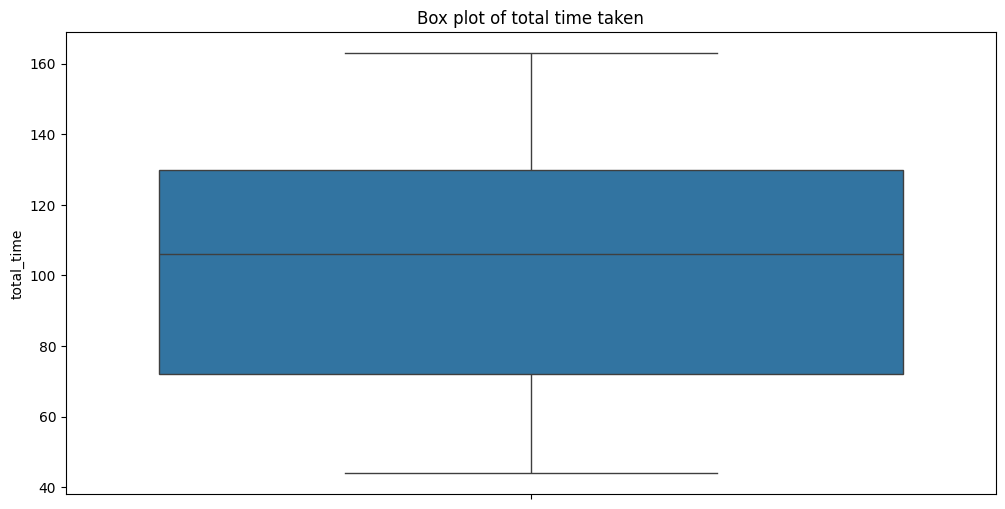

In [91]:
plt.figure(figsize=(12,6))
plt.title("Box plot of total time taken")
ax = sns.boxplot(data=flights_df1['total_time'])

I used a box plot to visualize the spread of time and detect outliers. The analysis revealed that there are no significant outliers that require treatment.

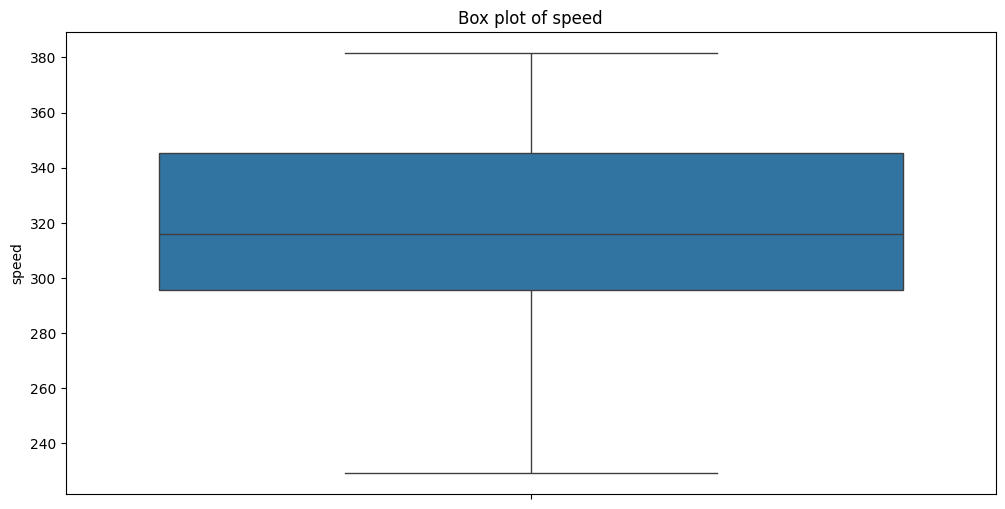

In [92]:
plt.figure(figsize=(12,6))
plt.title("Box plot of speed")
ax = sns.boxplot(data=flights_df1['speed'])

I used a box plot to visualize the spread of speed and detect outliers. The analysis revealed that there are no significant outliers that require treatment.

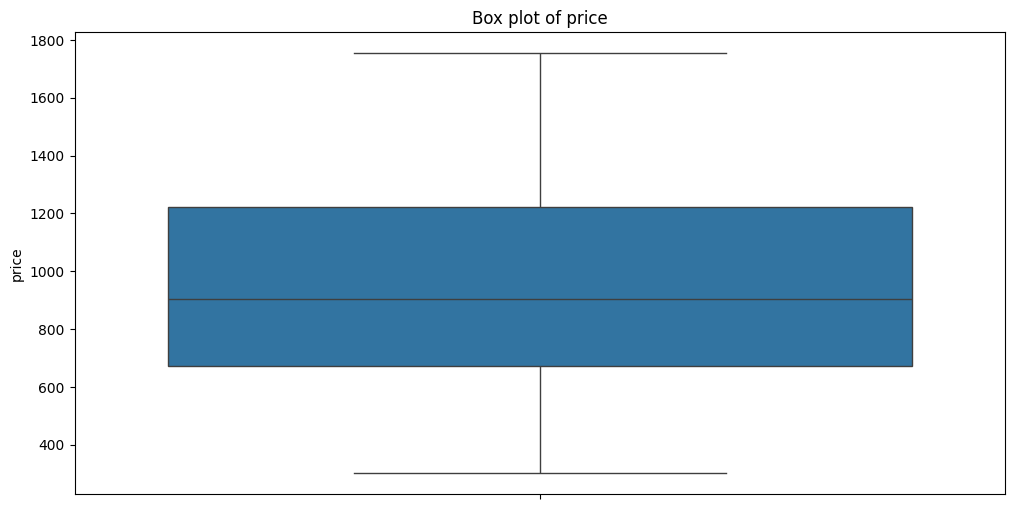

In [93]:
plt.figure(figsize=(12,6))
plt.title("Box plot of price")
ax = sns.boxplot(data=flights_df1['price'])

I used a box plot to visualize the price of distances and detect outliers. The analysis revealed that there are no significant outliers that require treatment.

### 3. Categorical Encoding

In [94]:
# Encode your categorical columns
categorical_data = flights_df1.select_dtypes(exclude=['int64', 'float','int32'])
numerical_data = flights_df1.select_dtypes(include=['int64', 'float','int32'])

In [95]:
categorical_data.head()

from                  to  flightType       agency  \
0         Recife (PE)  Florianopolis (SC)  firstClass  FlyingDrops   
1  Florianopolis (SC)         Recife (PE)  firstClass  FlyingDrops   
2       Brasilia (DF)  Florianopolis (SC)  firstClass      CloudFy   
3  Florianopolis (SC)       Brasilia (DF)  firstClass      CloudFy   
4        Aracaju (SE)       Salvador (BH)  firstClass      CloudFy   

                              route   weekday  
0    Recife (PE)-Florianopolis (SC)  Thursday  
1    Florianopolis (SC)-Recife (PE)    Monday  
2  Brasilia (DF)-Florianopolis (SC)  Thursday  
3  Florianopolis (SC)-Brasilia (DF)    Friday  
4        Aracaju (SE)-Salvador (BH)  Thursday

In [96]:
numerical_data.head()

travelCode  userCode    price  distance  total_time  weekday_num  month  \
0           0         0  1434.38    676.53         136            3      9   
1           0         0  1292.29    676.53         136            0      9   
2           1         0  1487.52    637.56         125            3     10   
3           1         0  1127.36    637.56         125            4     10   
4           2         0  1684.05    830.86         136            3     10   

   year       speed  
0  2019  298.469118  
1  2019  298.469118  
2  2019  306.028800  
3  2019  306.028800  
4  2019  366.555882

In [97]:
le = LabelEncoder()
categorical_data = categorical_data.apply(LabelEncoder().fit_transform)
categorical_data.head()

from  to  flightType  agency  route  weekday
0     5   3           1       1     43        4
1     3   5           1       1     28        1
2     1   3           1       0     10        4
3     3   1           1       0     25        0
4     0   7           1       0      6        4

In [98]:
import joblib
# Save the LabelEncoder to a file
joblib.dump(le, '/content/label.pkl')


['/content/label.pkl']

#### What all categorical encoding techniques have you used & why did you use those techniques?

*I used label encoding for categorical variables because it converts categorical values into numerical values, which is necessary for many machine learning algorithms that require numerical input.*

In [99]:
encode_df= pd.concat([categorical_data,numerical_data], axis=1)

In [100]:
encode_df.head()

from  to  flightType  agency  route  weekday  travelCode  userCode  \
0     5   3           1       1     43        4           0         0   
1     3   5           1       1     28        1           0         0   
2     1   3           1       0     10        4           1         0   
3     3   1           1       0     25        0           1         0   
4     0   7           1       0      6        4           2         0   

     price  distance  total_time  weekday_num  month  year       speed  
0  1434.38    676.53         136            3      9  2019  298.469118  
1  1292.29    676.53         136            0      9  2019  298.469118  
2  1487.52    637.56         125            3     10  2019  306.028800  
3  1127.36    637.56         125            4     10  2019  306.028800  
4  1684.05    830.86         136            3     10  2019  366.555882

In [101]:
encode_df.drop(['weekday'], axis=1, inplace=True)

In [102]:
encode_df.head()

from  to  flightType  agency  route  travelCode  userCode    price  \
0     5   3           1       1     43           0         0  1434.38   
1     3   5           1       1     28           0         0  1292.29   
2     1   3           1       0     10           1         0  1487.52   
3     3   1           1       0     25           1         0  1127.36   
4     0   7           1       0      6           2         0  1684.05   

   distance  total_time  weekday_num  month  year       speed  
0    676.53         136            3      9  2019  298.469118  
1    676.53         136            0      9  2019  298.469118  
2    637.56         125            3     10  2019  306.028800  
3    637.56         125            4     10  2019  306.028800  
4    830.86         136            3     10  2019  366.555882

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

*I have already completed feature manipulation during the data wrangling phase.*

#### 2. Feature Selection

In [103]:
# Select your features wisely to avoid overfitting

for col in encode_df.describe().columns.tolist():
    fig = plt.figure(figsize=(20, 6))
    ax = fig.gca()
    feature = encode_df[col]
    label = encode_df['price']
    correlation = feature.corr(label)
    sns.scatterplot(x=feature, y=label, color="gray")
    plt.xlabel(col)
    plt.ylabel('price')
    ax.set_title('price vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(encode_df[col], encode_df['price'], 1)
    y_hat = np.poly1d(z)(encode_df[col])
    plt.plot(encode_df[col], y_hat, "r--", lw=1)
    plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [104]:
encode_df.corr()

from        to  flightType    agency     route  travelCode  \
from         1.000000 -0.177147    0.000664 -0.001697  0.993522    0.085893   
to          -0.177147  1.000000    0.000664 -0.001697 -0.067732    0.085893   
flightType   0.000664  0.000664    1.000000  0.000679  0.000792   -0.000607   
agency      -0.001697 -0.001697    0.000679  1.000000 -0.001886   -0.001368   
route        0.993522 -0.067732    0.000792 -0.001886  1.000000    0.097971   
travelCode   0.085893  0.085893   -0.000607 -0.001368  0.097971    1.000000   
userCode     0.085451  0.085451   -0.000568 -0.001418  0.097511    0.999894   
price        0.028157 -0.087037    0.272147  0.000974  0.017137    0.135749   
distance     0.001387  0.001387    0.004487 -0.000343  0.005063    0.310703   
total_time  -0.000493 -0.000493    0.003769  0.000756  0.003825    0.340019   
weekday_num  0.067275 -0.067543    0.005209 -0.001504  0.060386   -0.000484   
month        0.000632  0.003365   -0.000744  0.002657  0.001047    0.003233   
year        -0.002945 -0.005892    0.001596 -0.000189 -0.003579   -0.000528   
speed       -0.000151 -0.000151    0.003957 -0.002369 -0.000597    0.158926   

             userCode     price  distance  total_time  weekday_num     month  \
from         0.085451  0.028157  0.001387   -0.000493     0.067275  0.000632   
to           0.085451 -0.087037  0.001387   -0.000493    -0.067543  0.003365   
flightType  -0.000568  0.272147  0.004487    0.003769     0.005209 -0.000744   
agency      -0.001418  0.000974 -0.000343    0.000756    -0.001504  0.002657   
route        0.097511  0.017137  0.005063    0.003825     0.060386  0.001047   
travelCode   0.999894  0.135749  0.310703    0.340019    -0.000484  0.003233   
userCode     1.000000  0.137282  0.313996    0.343315    -0.000521  0.003260   
price        0.137282  1.000000  0.641915    0.631045     0.016060 -0.000013   
distance     0.313996  0.641915  1.000000    0.955154    -0.002558  0.000942   
total_time   0.343315  0.631045  0.955154    1.000000    -0.002438  0.001283   
weekday_num -0.000521  0.016060 -0.002558   -0.002438     1.000000 -0.005024   
month        0.003260 -0.000013  0.000942    0.001283    -0.005024  1.000000   
year        -0.001322  0.007291  0.008011    0.008064     0.000952 -0.355074   
speed        0.161047  0.418726  0.709277    0.493377    -0.002153  0.000454   

                 year     speed  
from        -0.002945 -0.000151  
to          -0.005892 -0.000151  
flightType   0.001596  0.003957  
agency      -0.000189 -0.002369  
route       -0.003579 -0.000597  
travelCode  -0.000528  0.158926  
userCode    -0.001322  0.161047  
price        0.007291  0.418726  
distance     0.008011  0.709277  
total_time   0.008064  0.493377  
weekday_num  0.000952 -0.002153  
month       -0.355074  0.000454  
year         1.000000  0.005134  
speed        0.005134  1.000000

<Axes: >

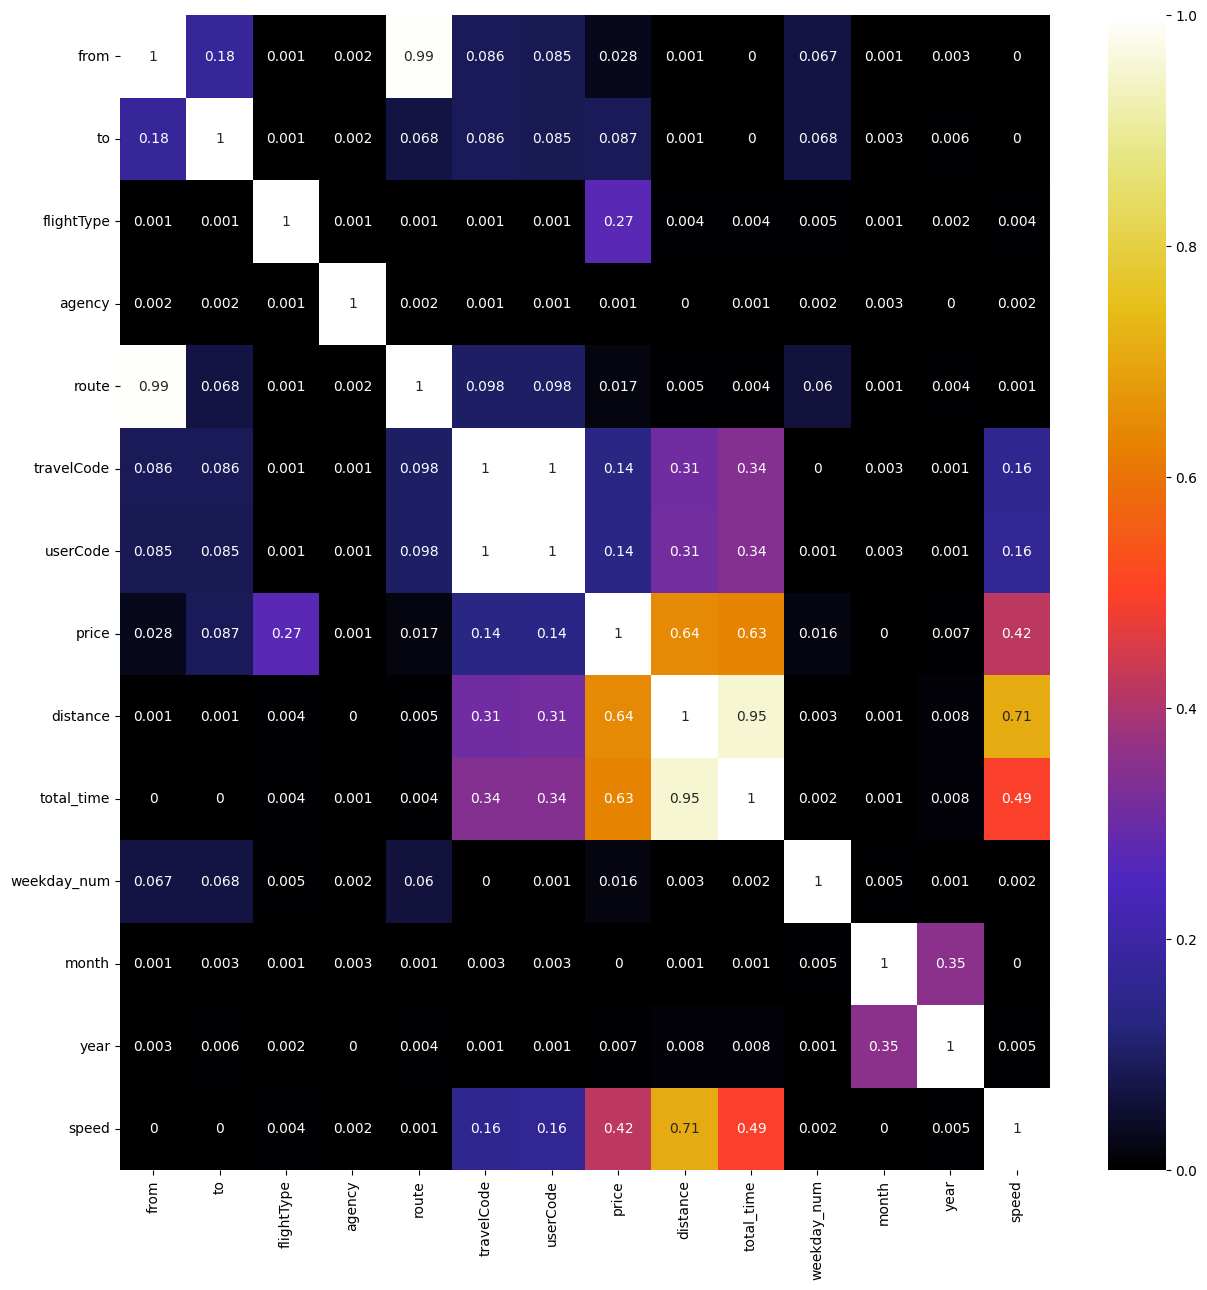

In [105]:
plt.figure(figsize=(15,15))
sns.heatmap(abs(round(encode_df.corr(),3)), annot=True, cmap=plt.cm.CMRmap)

##### What all feature selection methods have you used  and why?

* We have used scatter plot to check how each variable is affecting on target variable.

* Correlation Matrix(Heatmap): A correlation matrix can be used to select features that have high correlations with the target variable and low correlations with other features.

##### Which all features you found important and why?

**Important Features:**

* Distance (distance): Correlation with price is 0.6419. This strong positive correlation indicates that as the distance increases, the price tends to increase.

* Total Time (total_time): Correlation with price is 0.6310. Similar to distance, total time also shows a strong positive correlation with the price.

* Speed (speed): Correlation with price is 0.4187. This moderate positive correlation suggests that speed also has an impact on the price.

These features are likely important for the model because they show a significant correlation with the target variable, price.

**Potentially Less Important Features:**

* Agency (agency): Correlation with price is very low (0.000974). This suggests that the choice of agency does not significantly affect the price in this dataset.

* Route (route): Correlation with price is also low (0.017137). Similar to agency, route does not seem to have a significant impact on the price.

* Month (month): Correlation with price is almost zero (-0.000013), indicating little to no linear relationship with the price.

These features may be less impactful for the model as they show little to no correlation with the target variable.

**Multicollinearity Concerns:**

* TravelCode and UserCode: These features are highly correlated with each other (correlation ~1) and have similar correlations with the target variable.

* Distance and Total Time: High correlation (0.9552) between these features suggests that they might be capturing similar information.

# **Optional:**

***Checking the other dataset variables to identify any underlying patterns or correlations with our target variable.***

In [106]:
users_df.head()

code company             name  gender  age
0     0    4You        Roy Braun    male   21
1     1    4You   Joseph Holsten    male   37
2     2    4You    Wilma Mcinnis  female   48
3     3    4You     Paula Daniel  female   23
4     4    4You  Patricia Carson  female   44

In [107]:
flights_df.head()

travelCode  userCode                from                  to  flightType  \
0           0         0         Recife (PE)  Florianopolis (SC)  firstClass   
1           0         0  Florianopolis (SC)         Recife (PE)  firstClass   
2           1         0       Brasilia (DF)  Florianopolis (SC)  firstClass   
3           1         0  Florianopolis (SC)       Brasilia (DF)  firstClass   
4           2         0        Aracaju (SE)       Salvador (BH)  firstClass   

     price  time  distance       agency       date  \
0  1434.38  1.76    676.53  FlyingDrops 2019-09-26   
1  1292.29  1.76    676.53  FlyingDrops 2019-09-30   
2  1487.52  1.66    637.56      CloudFy 2019-10-03   
3  1127.36  1.66    637.56      CloudFy 2019-10-04   
4  1684.05  2.16    830.86      CloudFy 2019-10-10   

                              route  total_time  weekday_num  month  year  \
0    Recife (PE)-Florianopolis (SC)         136            3      9  2019   
1    Florianopolis (SC)-Recife (PE)         136            0      9  2019   
2  Brasilia (DF)-Florianopolis (SC)         125            3     10  2019   
3  Florianopolis (SC)-Brasilia (DF)         125            4     10  2019   
4        Aracaju (SE)-Salvador (BH)         136            3     10  2019   

    weekday       speed  
0  Thursday  298.469118  
1    Monday  298.469118  
2  Thursday  306.028800  
3    Friday  306.028800  
4  Thursday  366.555882

In [108]:
con_data=pd.merge(flights_df,users_df,how='left',left_on='userCode',right_on='code')

In [109]:
con_data.head()

travelCode  userCode                from                  to  flightType  \
0           0         0         Recife (PE)  Florianopolis (SC)  firstClass   
1           0         0  Florianopolis (SC)         Recife (PE)  firstClass   
2           1         0       Brasilia (DF)  Florianopolis (SC)  firstClass   
3           1         0  Florianopolis (SC)       Brasilia (DF)  firstClass   
4           2         0        Aracaju (SE)       Salvador (BH)  firstClass   

     price  time  distance       agency       date  ... weekday_num  month  \
0  1434.38  1.76    676.53  FlyingDrops 2019-09-26  ...           3      9   
1  1292.29  1.76    676.53  FlyingDrops 2019-09-30  ...           0      9   
2  1487.52  1.66    637.56      CloudFy 2019-10-03  ...           3     10   
3  1127.36  1.66    637.56      CloudFy 2019-10-04  ...           4     10   
4  1684.05  2.16    830.86      CloudFy 2019-10-10  ...           3     10   

   year   weekday       speed code  company       name gender age  
0  2019  Thursday  298.469118    0     4You  Roy Braun   male  21  
1  2019    Monday  298.469118    0     4You  Roy Braun   male  21  
2  2019  Thursday  306.028800    0     4You  Roy Braun   male  21  
3  2019    Friday  306.028800    0     4You  Roy Braun   male  21  
4  2019  Thursday  366.555882    0     4You  Roy Braun   male  21  

[5 rows x 22 columns]

In [110]:
hotels_df.head()

travelCode  userCode     name               place  days   price    total  \
0           0         0  Hotel A  Florianopolis (SC)     4  313.02  1252.08   
1           2         0  Hotel K       Salvador (BH)     2  263.41   526.82   
2           7         0  Hotel K       Salvador (BH)     3  263.41   790.23   
3          11         0  Hotel K       Salvador (BH)     4  263.41  1053.64   
4          13         0  Hotel A  Florianopolis (SC)     1  313.02   313.02   

         date  
0  09/26/2019  
1  10/10/2019  
2  11/14/2019  
3  12/12/2019  
4  12/26/2019

In [111]:
con_data1=pd.merge(con_data,hotels_df,how='left',left_on='travelCode',right_on='travelCode')

In [112]:
con_data1.head()

travelCode  userCode_x                from                  to  flightType  \
0           0           0         Recife (PE)  Florianopolis (SC)  firstClass   
1           0           0  Florianopolis (SC)         Recife (PE)  firstClass   
2           1           0       Brasilia (DF)  Florianopolis (SC)  firstClass   
3           1           0  Florianopolis (SC)       Brasilia (DF)  firstClass   
4           2           0        Aracaju (SE)       Salvador (BH)  firstClass   

   price_x  time  distance       agency     date_x  ...     name_x  gender  \
0  1434.38  1.76    676.53  FlyingDrops 2019-09-26  ...  Roy Braun    male   
1  1292.29  1.76    676.53  FlyingDrops 2019-09-30  ...  Roy Braun    male   
2  1487.52  1.66    637.56      CloudFy 2019-10-03  ...  Roy Braun    male   
3  1127.36  1.66    637.56      CloudFy 2019-10-04  ...  Roy Braun    male   
4  1684.05  2.16    830.86      CloudFy 2019-10-10  ...  Roy Braun    male   

   age  userCode_y   name_y               place  days  price_y    total  \
0   21         0.0  Hotel A  Florianopolis (SC)   4.0   313.02  1252.08   
1   21         0.0  Hotel A  Florianopolis (SC)   4.0   313.02  1252.08   
2   21         NaN      NaN                 NaN   NaN      NaN      NaN   
3   21         NaN      NaN                 NaN   NaN      NaN      NaN   
4   21         0.0  Hotel K       Salvador (BH)   2.0   263.41   526.82   

       date_y  
0  09/26/2019  
1  09/26/2019  
2         NaN  
3         NaN  
4  10/10/2019  

[5 rows x 29 columns]

In [113]:
con_data1.columns

Index(['travelCode', 'userCode_x', 'from', 'to', 'flightType', 'price_x',
       'time', 'distance', 'agency', 'date_x', 'route', 'total_time',
       'weekday_num', 'month', 'year', 'weekday', 'speed', 'code', 'company',
       'name_x', 'gender', 'age', 'userCode_y', 'name_y', 'place', 'days',
       'price_y', 'total', 'date_y'],
      dtype='object')

In [114]:
con_data1.drop(['time','date_x','weekday','code','userCode_y','date_y'], axis=1, inplace=True)

In [115]:
con_data1.head()

travelCode  userCode_x                from                  to  flightType  \
0           0           0         Recife (PE)  Florianopolis (SC)  firstClass   
1           0           0  Florianopolis (SC)         Recife (PE)  firstClass   
2           1           0       Brasilia (DF)  Florianopolis (SC)  firstClass   
3           1           0  Florianopolis (SC)       Brasilia (DF)  firstClass   
4           2           0        Aracaju (SE)       Salvador (BH)  firstClass   

   price_x  distance       agency                             route  \
0  1434.38    676.53  FlyingDrops    Recife (PE)-Florianopolis (SC)   
1  1292.29    676.53  FlyingDrops    Florianopolis (SC)-Recife (PE)   
2  1487.52    637.56      CloudFy  Brasilia (DF)-Florianopolis (SC)   
3  1127.36    637.56      CloudFy  Florianopolis (SC)-Brasilia (DF)   
4  1684.05    830.86      CloudFy        Aracaju (SE)-Salvador (BH)   

   total_time  ...       speed  company     name_x  gender age   name_y  \
0         136  ...  298.469118     4You  Roy Braun    male  21  Hotel A   
1         136  ...  298.469118     4You  Roy Braun    male  21  Hotel A   
2         125  ...  306.028800     4You  Roy Braun    male  21      NaN   
3         125  ...  306.028800     4You  Roy Braun    male  21      NaN   
4         136  ...  366.555882     4You  Roy Braun    male  21  Hotel K   

                place  days price_y    total  
0  Florianopolis (SC)   4.0  313.02  1252.08  
1  Florianopolis (SC)   4.0  313.02  1252.08  
2                 NaN   NaN     NaN      NaN  
3                 NaN   NaN     NaN      NaN  
4       Salvador (BH)   2.0  263.41   526.82  

[5 rows x 23 columns]

In [116]:
con_categorical_data =con_data1.select_dtypes(exclude=['int64', 'float','int32'])
con_numerical_data = con_data1.select_dtypes(include=['int64', 'float','int32'])

In [117]:
le = LabelEncoder()
con_categorical_data = con_categorical_data.apply(LabelEncoder().fit_transform)
con_categorical_data.head()

from  to  flightType  agency  route  company  name_x  gender  name_y  place
0     5   3           1       1     43        0    1116       1       0      3
1     3   5           1       1     28        0    1116       1       0      3
2     1   3           1       0     10        0    1116       1       9      9
3     3   1           1       0     25        0    1116       1       9      9
4     0   7           1       0      6        0    1116       1       7      7

In [118]:
con_encode_df= pd.concat([con_categorical_data,con_numerical_data], axis=1)

In [119]:
con_encode_df.head()

from  to  flightType  agency  route  company  name_x  gender  name_y  \
0     5   3           1       1     43        0    1116       1       0   
1     3   5           1       1     28        0    1116       1       0   
2     1   3           1       0     10        0    1116       1       9   
3     3   1           1       0     25        0    1116       1       9   
4     0   7           1       0      6        0    1116       1       7   

   place  ...  distance  total_time  weekday_num  month  year       speed  \
0      3  ...    676.53         136            3      9  2019  298.469118   
1      3  ...    676.53         136            0      9  2019  298.469118   
2      9  ...    637.56         125            3     10  2019  306.028800   
3      9  ...    637.56         125            4     10  2019  306.028800   
4      7  ...    830.86         136            3     10  2019  366.555882   

   age  days  price_y    total  
0   21   4.0   313.02  1252.08  
1   21   4.0   313.02  1252.08  
2   21   NaN      NaN      NaN  
3   21   NaN      NaN      NaN  
4   21   2.0   263.41   526.82  

[5 rows x 23 columns]

In [120]:
con_encode_df.corr()

from        to  flightType    agency     route   company  \
from         1.000000 -0.177147    0.000664 -0.001697  0.993522  0.110116   
to          -0.177147  1.000000    0.000664 -0.001697 -0.067732  0.110116   
flightType   0.000664  0.000664    1.000000  0.000679  0.000792 -0.001954   
agency      -0.001697 -0.001697    0.000679  1.000000 -0.001886  0.001775   
route        0.993522 -0.067732    0.000792 -0.001886  1.000000  0.121818   
company      0.110116  0.110116   -0.001954  0.001775  0.121818  1.000000   
name_x      -0.001543 -0.001543   -0.000443 -0.005047 -0.001658 -0.019207   
gender      -0.008956 -0.008956   -0.005878 -0.001153 -0.009978 -0.041654   
name_y      -0.026907 -0.026907    0.001494  0.001122 -0.029931  0.011203   
place        0.146702  0.146702    0.001576  0.000028  0.164892 -0.003180   
travelCode   0.085893  0.085893   -0.000607 -0.001368  0.097971  0.619987   
userCode_x   0.085451  0.085451   -0.000568 -0.001418  0.097511  0.613097   
price_x      0.028157 -0.087037    0.272147  0.000974  0.017137 -0.013873   
distance     0.001387  0.001387    0.004487 -0.000343  0.005063 -0.019173   
total_time  -0.000493 -0.000493    0.003769  0.000756  0.003825  0.000841   
weekday_num  0.067275 -0.067543    0.005209 -0.001504  0.060386  0.000654   
month        0.000632  0.003365   -0.000744  0.002657  0.001047  0.003729   
year        -0.002945 -0.005892    0.001596 -0.000189 -0.003579 -0.014789   
speed       -0.000151 -0.000151    0.003957 -0.002369 -0.000597 -0.035070   
age         -0.007474 -0.007474    0.001963 -0.002935 -0.008615 -0.001437   
days         0.001180  0.001180   -0.003287 -0.002331  0.001281 -0.005963   
price_y     -0.015797 -0.015797   -0.004767  0.006264 -0.014562  0.028272   
total       -0.007852 -0.007852   -0.004828  0.001924 -0.006929  0.013574   

               name_x    gender    name_y     place  ...  distance  \
from        -0.001543 -0.008956 -0.026907  0.146702  ...  0.001387   
to          -0.001543 -0.008956 -0.026907  0.146702  ...  0.001387   
flightType  -0.000443 -0.005878  0.001494  0.001576  ...  0.004487   
agency      -0.005047 -0.001153  0.001122  0.000028  ... -0.000343   
route       -0.001658 -0.009978 -0.029931  0.164892  ...  0.005063   
company     -0.019207 -0.041654  0.011203 -0.003180  ... -0.019173   
name_x       1.000000 -0.073796 -0.003008 -0.001348  ...  0.015493   
gender      -0.073796  1.000000 -0.001104 -0.001005  ... -0.006927   
name_y      -0.003008 -0.001104  1.000000  0.647496  ...  0.070716   
place       -0.001348 -0.001005  0.647496  1.000000  ...  0.005179   
travelCode   0.005691 -0.025629  0.027724 -0.005482  ...  0.310703   
userCode_x   0.006618 -0.025657  0.027840 -0.005488  ...  0.313996   
price_x      0.007544 -0.002276  0.040995 -0.009051  ...  0.641915   
distance     0.015493 -0.006927  0.070716  0.005179  ...  1.000000   
total_time   0.016973 -0.007747  0.046165 -0.002692  ...  0.955154   
weekday_num  0.001698  0.000172  0.001050 -0.000192  ... -0.002558   
month       -0.000682 -0.001278 -0.001550  0.000382  ...  0.000942   
year         0.021280  0.001642  0.001979 -0.002717  ...  0.008011   
speed        0.007323 -0.005594  0.081135  0.015932  ...  0.709277   
age          0.044291 -0.022434 -0.001588 -0.000795  ... -0.025818   
days        -0.002757 -0.004475 -0.001537  0.007193  ... -0.001956   
price_y      0.003332  0.007800 -0.223930 -0.010092  ...  0.223009   
total       -0.001695  0.000279 -0.134509 -0.000219  ...  0.132348   

             total_time  weekday_num     month      year     speed       age  \
from          -0.000493     0.067275  0.000632 -0.002945 -0.000151 -0.007474   
to            -0.000493    -0.067543  0.003365 -0.005892 -0.000151 -0.007474   
flightType     0.003769     0.005209 -0.000744  0.001596  0.003957  0.001963   
agency         0.000756    -0.001504  0.002657 -0.000189 -0.002369 -0.002935   
route          0.003825     0.060386  0.001047 -0.003579 -0.000597 -0.008615   
company

<Axes: >

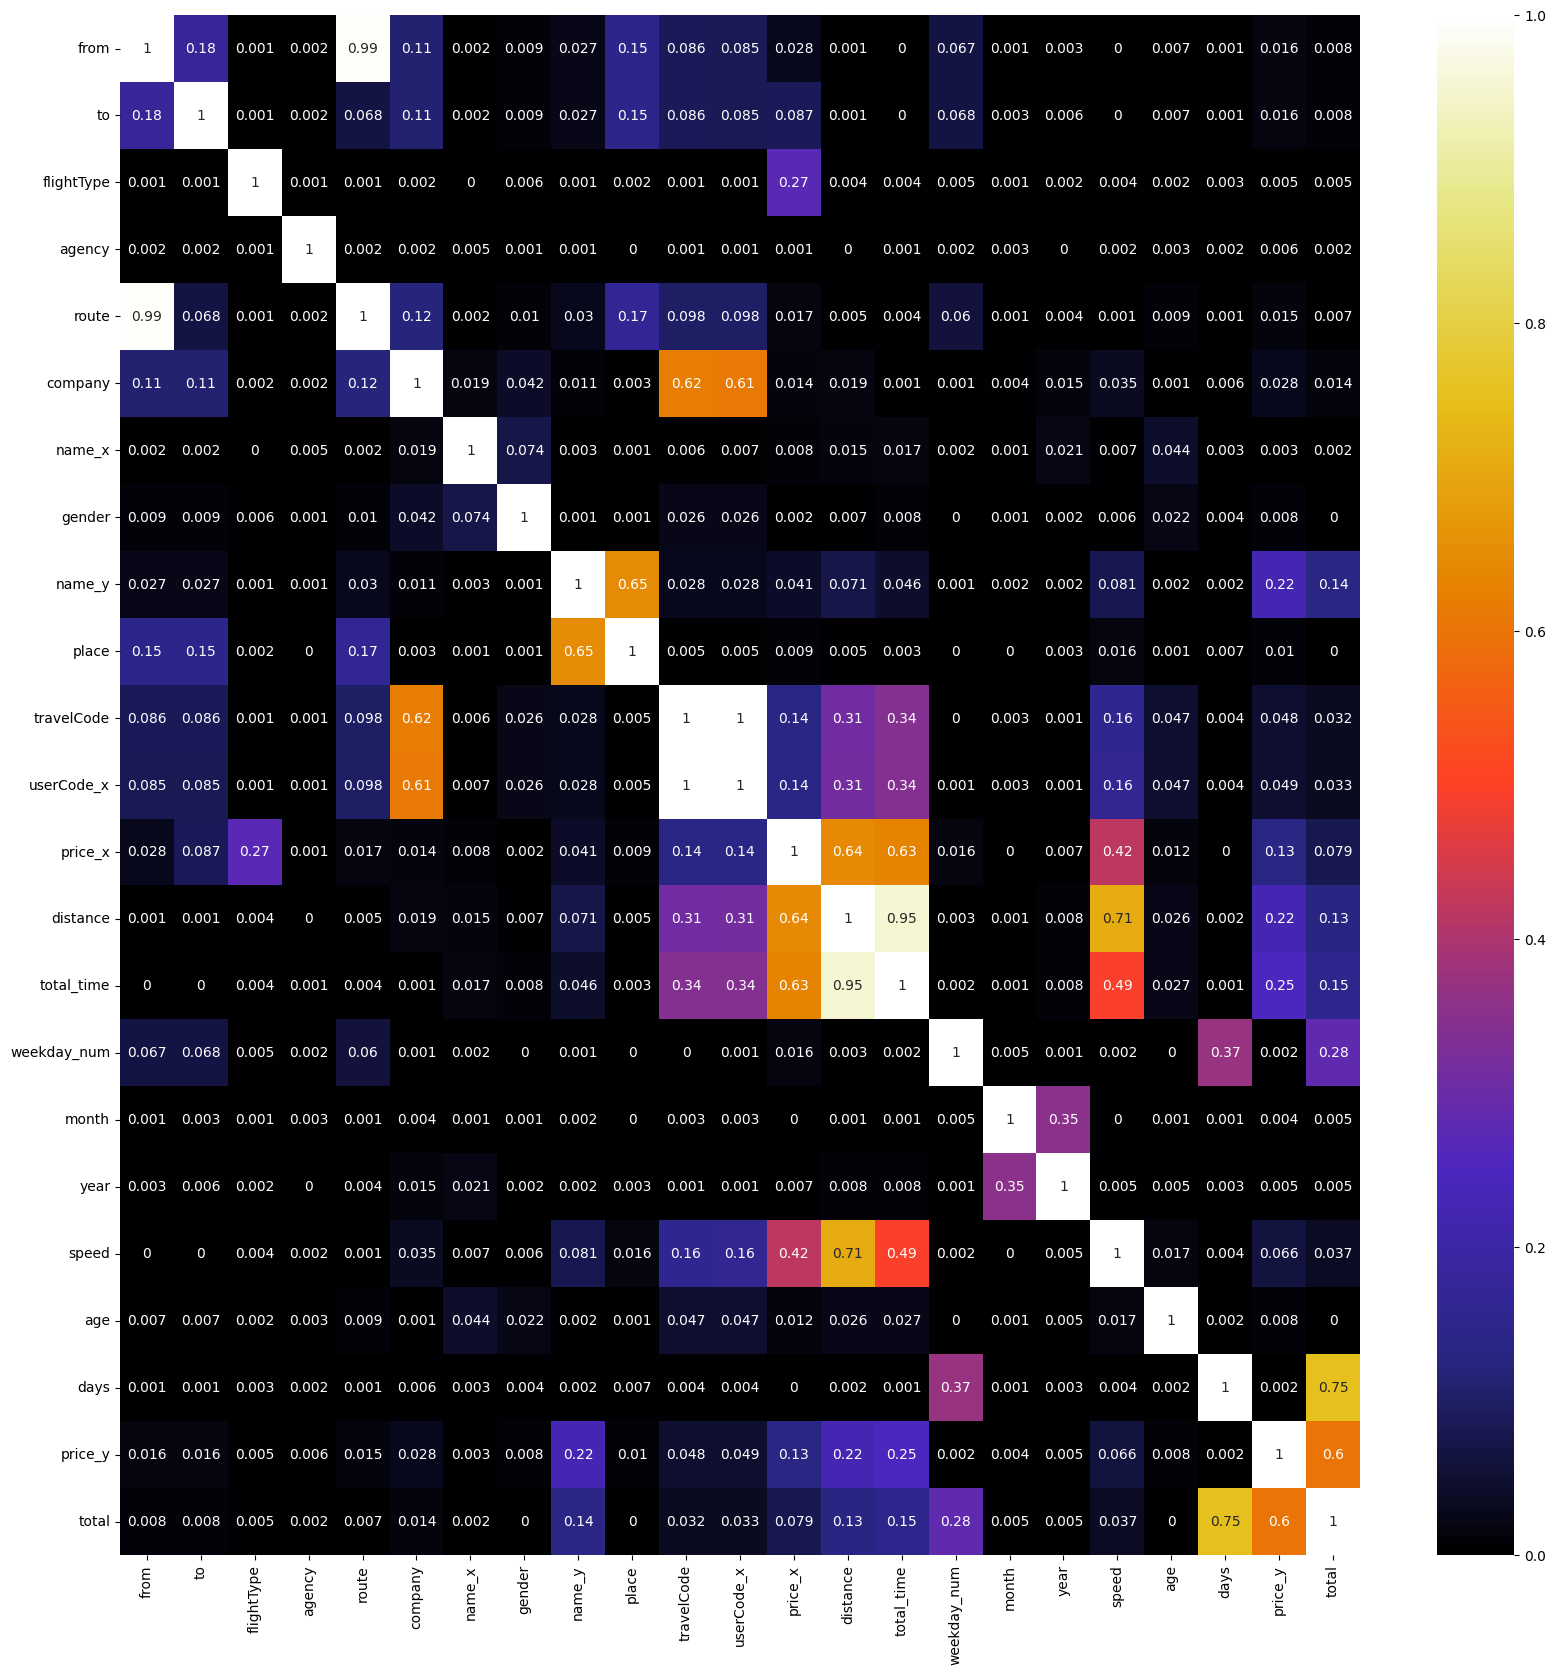

In [121]:
plt.figure(figsize=(20,20))
sns.heatmap(abs(round(con_encode_df.corr(),3)), annot=True, cmap=plt.cm.CMRmap)

*From the analysis of the variables and the correlation matrix, it is evident that there are no significant variables strongly correlated with our target variable.*

# **Final dataset for Ml Model**

In [122]:
encode_df.head()

from  to  flightType  agency  route  travelCode  userCode    price  \
0     5   3           1       1     43           0         0  1434.38   
1     3   5           1       1     28           0         0  1292.29   
2     1   3           1       0     10           1         0  1487.52   
3     3   1           1       0     25           1         0  1127.36   
4     0   7           1       0      6           2         0  1684.05   

   distance  total_time  weekday_num  month  year       speed  
0    676.53         136            3      9  2019  298.469118  
1    676.53         136            0      9  2019  298.469118  
2    637.56         125            3     10  2019  306.028800  
3    637.56         125            4     10  2019  306.028800  
4    830.86         136            3     10  2019  366.555882

In [123]:
final_df=encode_df[['from','to','flightType','agency','weekday_num','month','year','speed','price']]

In [124]:
final_df.head()

from  to  flightType  agency  weekday_num  month  year       speed    price
0     5   3           1       1            3      9  2019  298.469118  1434.38
1     3   5           1       1            0      9  2019  298.469118  1292.29
2     1   3           1       0            3     10  2019  306.028800  1487.52
3     3   1           1       0            4     10  2019  306.028800  1127.36
4     0   7           1       0            3     10  2019  366.555882  1684.05

<Axes: >

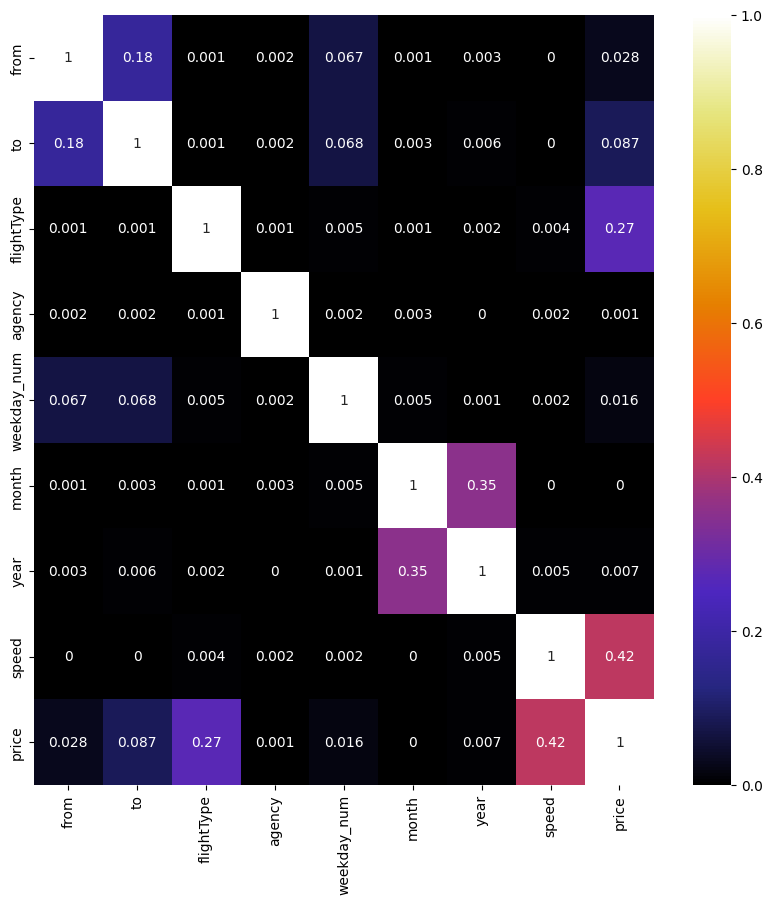

In [125]:
plt.figure(figsize=(10,10))
sns.heatmap(abs(round(final_df.corr(),3)), annot=True, cmap=plt.cm.CMRmap)

### 5. Data Transformation

Before Applying Transformation


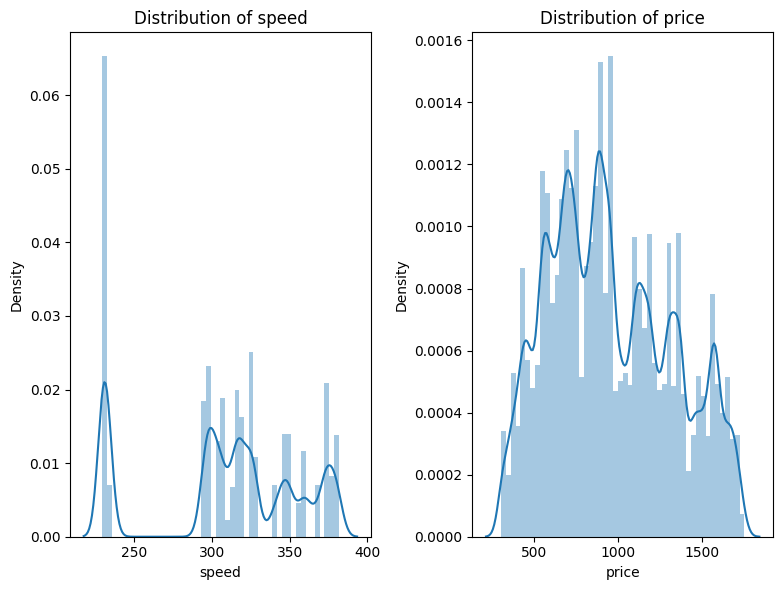

In [126]:
cont_variables= ["speed","price"]
plt.figure(figsize=(20,6))
print("Before Applying Transformation")
for n,col in enumerate(cont_variables):
  plt.subplot(1,5,n+1)
  sns.distplot(final_df[col])
  plt.title(f'Distribution of {col}')
  plt.tight_layout()

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

*No,The Data set no need of transformation*

In [127]:
# Creating 5 different copies to check the distribution of each of the variable
test_df1=final_df.copy()
test_df2=final_df.copy()
test_df3=final_df.copy()
test_df4=final_df.copy()

After Applying Transformation


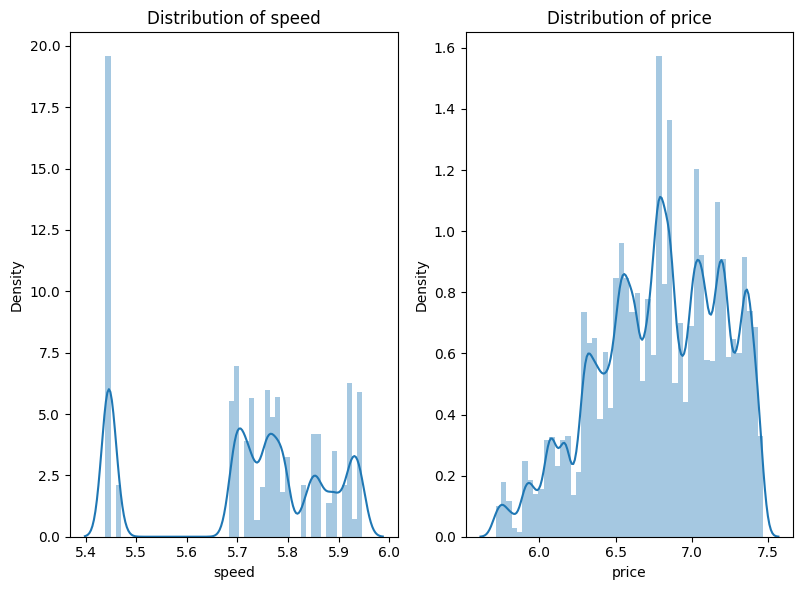

In [128]:
test_df1['speed']=np.log(test_df1['speed']+1)
test_df1['price']=np.log(test_df1['price']+1)

# Checking the distribution of each continous variable by excluding 0 from our final dataframe
plt.figure(figsize=(20,6))
print("After Applying Transformation")
for n,col in enumerate(cont_variables):
  plt.subplot(1,5,n+1)
  sns.distplot(test_df1[col])
  plt.title(f'Distribution of {col}')
  plt.tight_layout()


After Applying Transformation


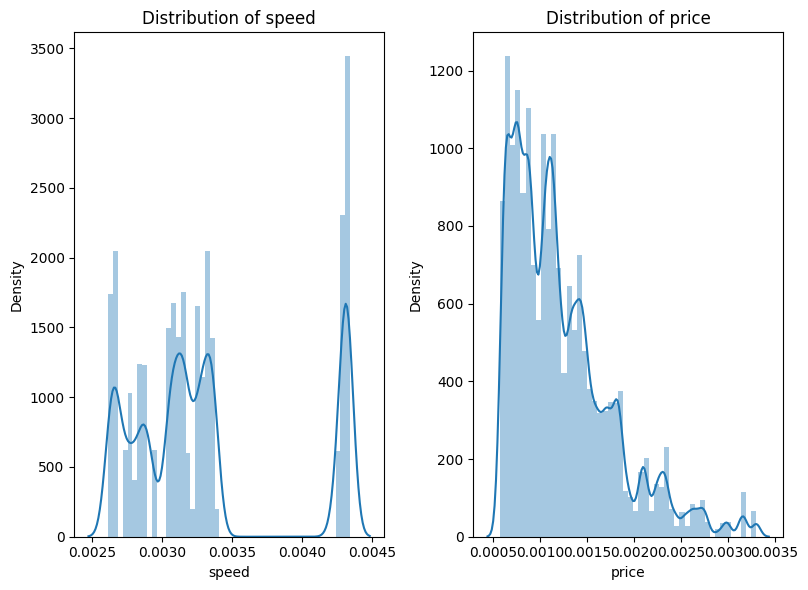

In [129]:
# Applying transformation on the above considered columns
test_df2['speed']=1/(test_df2['speed']+1)
test_df2['price']=1/(test_df2['price']+1)


# Checking the distribution of each continous variable by excluding 0 from our final dataframe
plt.figure(figsize=(20,6))
print("After Applying Transformation")
for n,col in enumerate(cont_variables):
  plt.subplot(1,5,n+1)
  sns.distplot(test_df2[col])
  plt.title(f'Distribution of {col}')
  plt.tight_layout()
plt.show()


After Applying Transformation


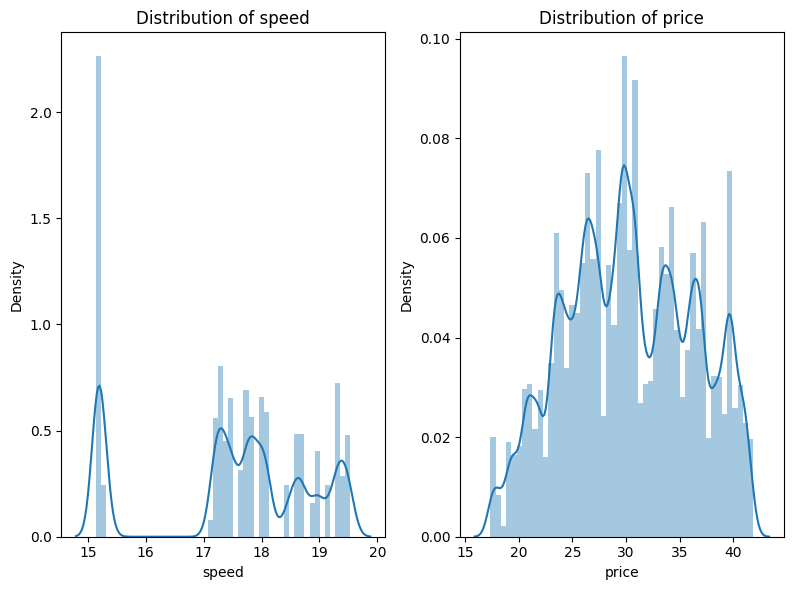

In [130]:
 #Applying transformation on the above considered columns
test_df3['speed']=(test_df3['speed'])**(1/2)
test_df3['price']=(test_df3['price'])**(1/2)


# Checking the distribution of each continous variable by excluding 0 from our final dataframe
plt.figure(figsize=(20,6))
print("After Applying Transformation")
for n,col in enumerate(cont_variables):
  plt.subplot(1,5,n+1)
  sns.distplot(test_df3[col])
  plt.title(f'Distribution of {col}')
  plt.tight_layout()
plt.show()

After Applying Transformation


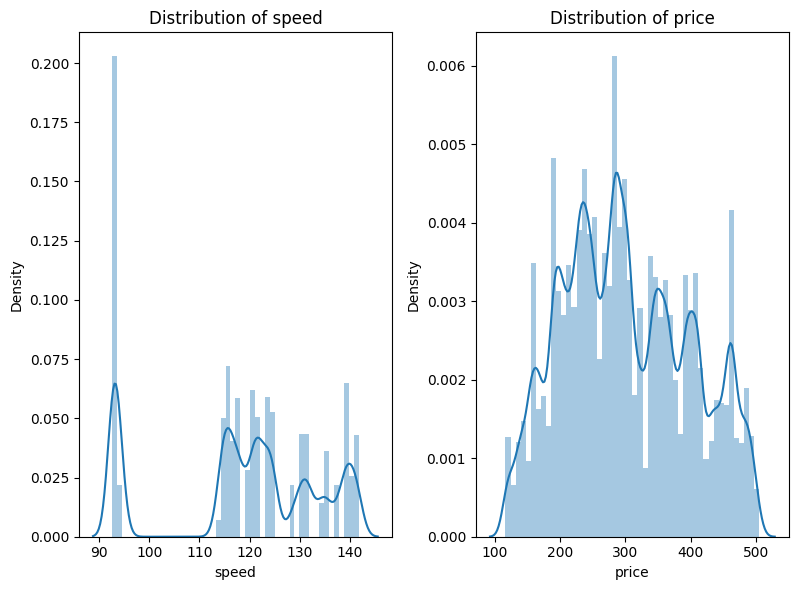

In [131]:

# Applying transformation on the above considered columns
test_df4['speed']=(test_df4['speed'])**(1/1.2)
test_df4['price']=(test_df4['price'])**(1/1.2)


# Checking the distribution of each continous variable by excluding 0 from our final dataframe
plt.figure(figsize=(20,6))
print("After Applying Transformation")
for n,col in enumerate(cont_variables):
  plt.subplot(1,5,n+1)
  sns.distplot(test_df4[col])
  plt.title(f'Distribution of {col}')
  plt.tight_layout()
plt.show()


### 6. Data Scaling

In [132]:
# Scaling your data
# Separating "x" and "y" variables
x= final_df.drop('price',axis=1)
y= final_df[['price']]
print(x.shape)
print(y.shape)


(271888, 8)
(271888, 1)


In [133]:
# Creating object
std_regressor= StandardScaler()

# Fit and Transform
x= std_regressor.fit_transform(x)

In [134]:
joblib.dump(std_regressor, '/content/std_regressor.pkl')

['/content/std_regressor.pkl']

##### Which method have you used to scale you data and why?

*I used StandardScaler to scale our data because it standardizes features by removing the mean and scaling to unit variance, which helps improve the performance and convergence of many machine learning algorithms.*

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

*No need of dimensionality reduction process*

### 8. Data Splitting

In [135]:
# Split your data to train and test. Choose Splitting ratio wisely.
# Split your data to train and test. Choose Splitting ratio wisely.
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=10)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(217510, 8)
(54378, 8)
(217510, 1)
(54378, 1)


##### What data splitting ratio have you used and why?

*I used an 80-20 splitting ratio because it provides a balanced approach for training and testing. This ratio ensures that 80% of the data is used for training the model, allowing it to learn from a substantial amount of data, while the remaining 20% is reserved for testing to evaluate the model's performance on unseen data.*

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

*No need*

## ***7. ML Model Implementation***

In [136]:
# Defining the function that calculated regression metrics
def regression_metrics(y_train_actual,y_train_pred,y_test_actual,y_test_pred):
  print("-"*50)
  ## mean_absolute_error
  MAE_train= mean_absolute_error(y_train,y_train_pred)
  print("MAE on train is:" ,MAE_train)
  MAE_test= mean_absolute_error(y_test,y_test_pred)
  print("MAE on test is:" ,MAE_test)

  print("-"*50)

  ## mean_squared_error
  MSE_train= mean_squared_error(y_train, y_train_pred)
  print("MSE on train is:" ,MSE_train)
  MSE_test  = mean_squared_error(y_test, y_test_pred)
  print("MSE on test is:" ,MSE_test)

  print("-"*50)

  ## root_mean_squared_error
  RMSE_train = np.sqrt(MSE_train)
  print("RMSE on train is:" ,RMSE_train)
  RMSE_test = np.sqrt(MSE_test)
  print("RMSE on test is:" ,RMSE_test)

  print("-"*50)

   ## mean_absolute_percentage_error
  MAPE_train = mean_absolute_percentage_error(y_train, y_train_pred)*100
  print("MAPE on train is:" ,MAPE_train, " %")
  MAPE_test = mean_absolute_percentage_error(y_test, y_test_pred)*100
  print("MAPE on test is:" ,MAPE_test, " %")

  print("-"*50)

  ## r2_score
  R2_train= r2_score(y_train,y_train_pred)
  print("R2 on train is:" ,R2_train)
  R2_test= r2_score(y_test,y_test_pred)
  print("R2 on test is:" ,R2_test)

  print("-"*50)

  Accuracy_train= 100- MAPE_train
  print("Accuracy of train is:" ,Accuracy_train, " %")
  Accuracy_test= 100- MAPE_test
  print("Accuracy of test is:" ,Accuracy_test, " %")

  print("-"*50)

In [137]:
# Defining the function that plots Evaluation Metric Score Chart
def EvaluationMetricChart(yt,yp):
   ''' Prints Evaluation Metrics Chart'''
   #Plotting Actual and Predicted Values
   plt.figure(figsize=(18,6))
   plt.plot((yp)[:100])
   plt.plot((np.array(yt)[:100]))
   plt.legend(["Predicted","Actual"])
   plt.title('Actual and Predicted Time Duration')

### ML Model - 1 Linear Regression

In [138]:
# ML Model - 1 Implementation
linear_regressor= LinearRegression()
# Fit the Algorithm
linear_regressor.fit(x_train,y_train)
# Predict on the model
y_pred_lr_train = linear_regressor.predict(x_train)
y_pred_lr_test  = linear_regressor.predict(x_test)

In [139]:
linear_regressor.coef_

array([[  4.48589629, -29.96757526,  98.15798957,   0.36772259,
          3.40779588,   0.96193746,   2.03437715, 151.0146738 ]])

In [140]:
# Calculating the regression metrics
regression_metrics(y_train,y_pred_lr_train,y_test,y_pred_lr_test)

--------------------------------------------------
MAE on train is: 250.1023105539487
MAE on test is: 251.45178326478836
--------------------------------------------------
MSE on train is: 97455.59176943939
MSE on test is: 98265.16544170363
--------------------------------------------------
RMSE on train is: 312.1787817412314
RMSE on test is: 313.4727507163958
--------------------------------------------------
MAPE on train is: 30.38643920762722  %
MAPE on test is: 30.540369373664056  %
--------------------------------------------------
R2 on train is: 0.25624535716317887
R2 on test is: 0.2567957788057399
--------------------------------------------------
Accuracy of train is: 69.61356079237278  %
Accuracy of test is: 69.45963062633595  %
--------------------------------------------------


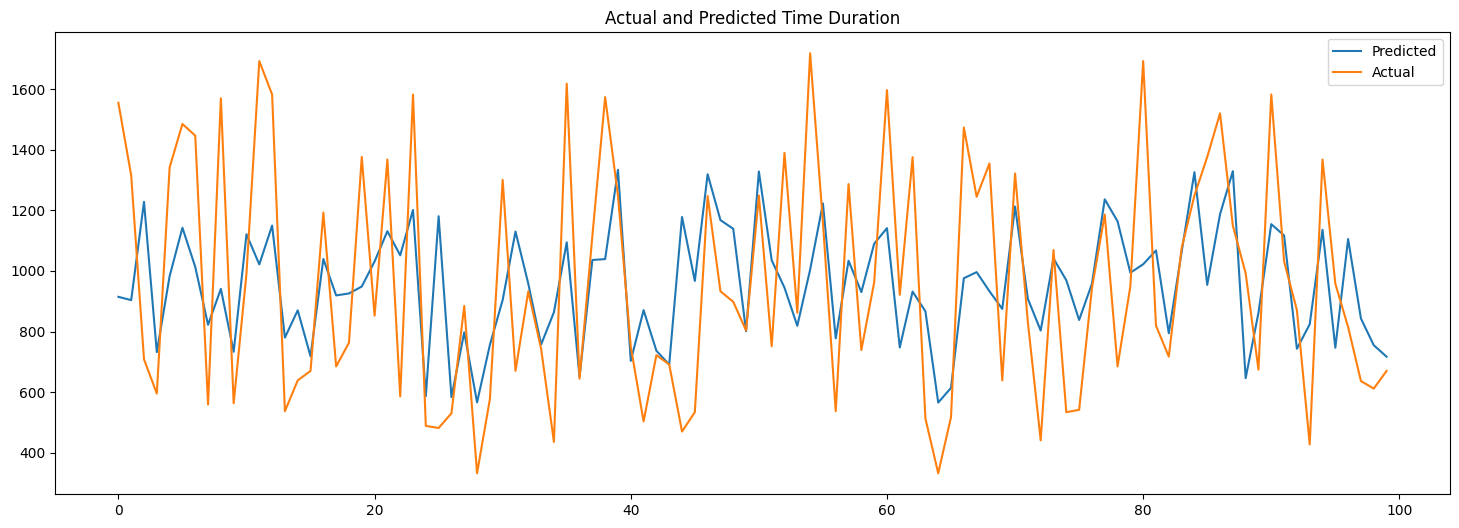

In [141]:
#Evaluation metrics Chart for Train set
EvaluationMetricChart(y_train,y_pred_lr_train)

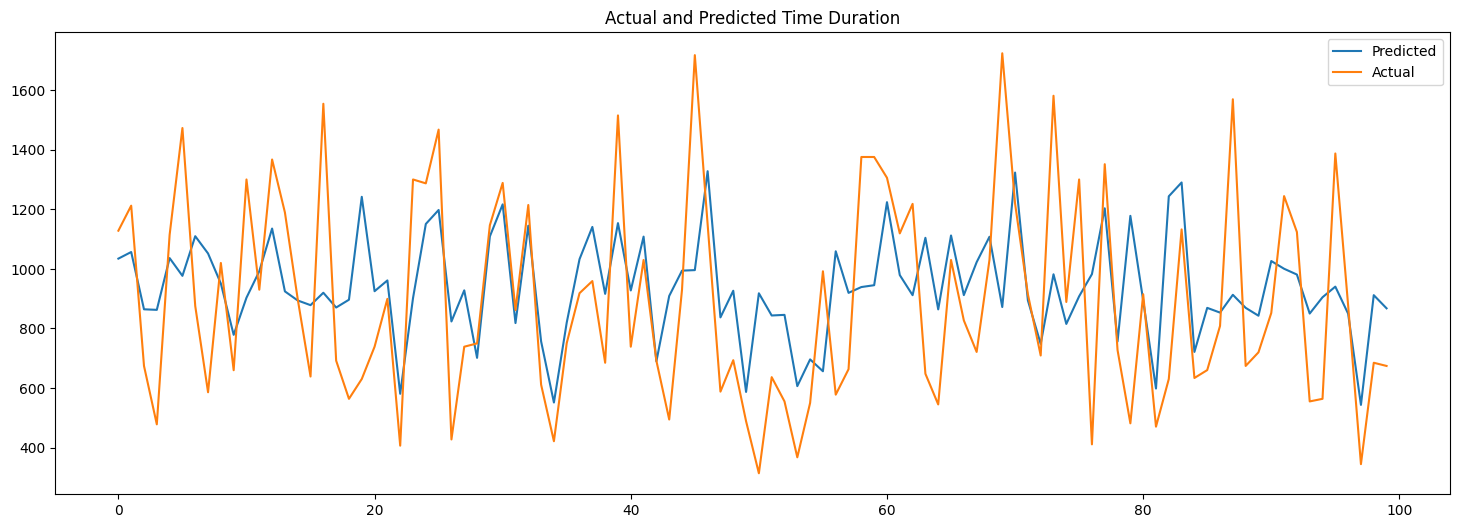

In [142]:
EvaluationMetricChart(y_test,y_pred_lr_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

*The linear regression model shows consistent performance between training and testing datasets. However, the relatively low R² and high MAPE suggest that the model's predictive performance is limited, indicating that further improvement or alternative modeling approaches may be needed to better capture the relationships in the data.*

### ML Model - 2 Lasso Regularization



In [143]:
lasso= Lasso()
# Defining parameters
parameters_lasso = {"alpha": [1e-5,1e-4,1e-3,1e-2,1e-1,1,5], "max_iter":[7,8,9,10]}
# Train the model
lassoR = GridSearchCV(lasso, parameters_lasso, scoring='neg_mean_squared_error', cv=5)
lassoR.fit(x_train,y_train)
# Predict the output
y_pred_lasso_train = lassoR.predict(x_train)
y_pred_lasso_test  = lassoR.predict(x_test)
# Printing the best parameters obtained by GridSearchCV
print(f"The best alpha value found out to be: {lassoR.best_params_}")
print(f"Negative mean square error is: {lassoR.best_score_}")

The best alpha value found out to be: {'alpha': 0.1, 'max_iter': 7}
Negative mean square error is: -97461.8527160397


In [144]:
# Calculating the regression metrics
regression_metrics(y_train,y_pred_lasso_train,y_test,y_pred_lasso_test)

--------------------------------------------------
MAE on train is: 250.11053436083048
MAE on test is: 251.46070869643552
--------------------------------------------------
MSE on train is: 97455.67729305424
MSE on test is: 98265.6818024846
--------------------------------------------------
RMSE on train is: 312.17891871978514
RMSE on test is: 313.4735743288174
--------------------------------------------------
MAPE on train is: 30.389811673032845  %
MAPE on test is: 30.543856568429412  %
--------------------------------------------------
R2 on train is: 0.25624470447014747
R2 on test is: 0.2567918734389667
--------------------------------------------------
Accuracy of train is: 69.61018832696715  %
Accuracy of test is: 69.45614343157058  %
--------------------------------------------------


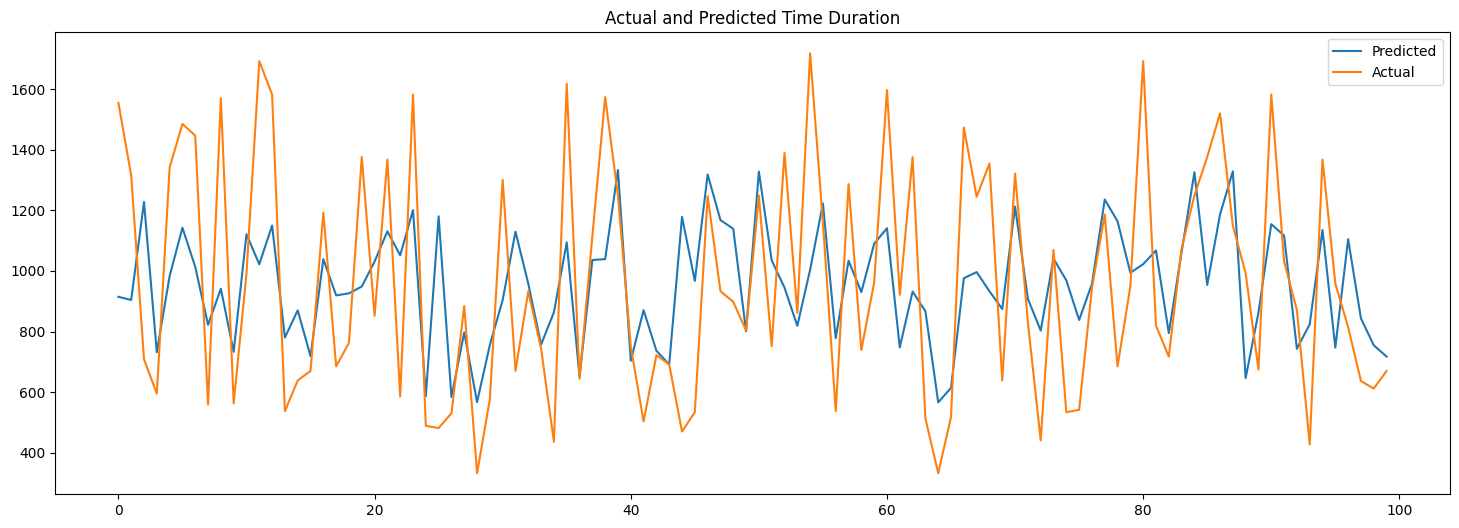

In [145]:
# Visualizing evaluation Metric Score chart
EvaluationMetricChart(y_train,y_pred_lasso_train)

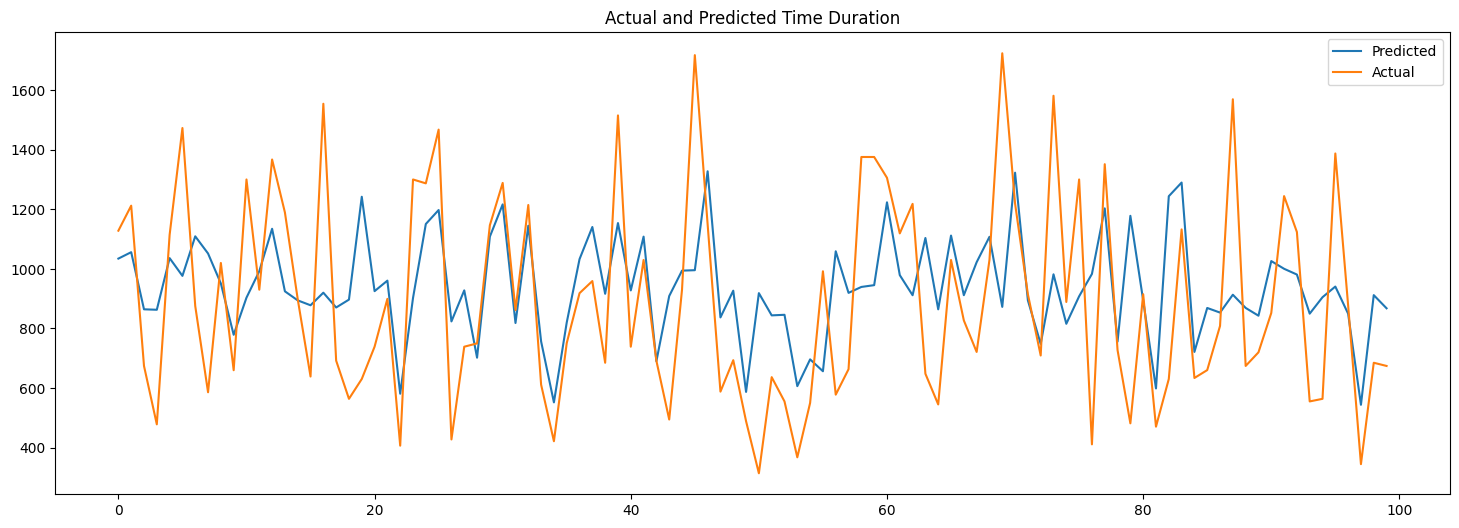

In [146]:
#Evaluation metrics Chart for Test set
EvaluationMetricChart(y_test,y_pred_lasso_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

*The Lasso Regression model shows performance metrics very similar to those of the linear regression model. The L1 regularization did not substantially change the MAE, MSE, RMSE, MAPE, R², or accuracy. This suggests that while Lasso helps with regularization and feature selection, it did not significantly enhance model performance or predictive power in this case. The low R² and high MAPE indicate that there is still room for improvement, possibly by exploring other models or tuning the regularization parameters.*

### ML Model - 3 Ridge Regularization

In [147]:
# ML Model - 3 Implementation
ridge= Ridge()
# Defining parameters
parameters = {"alpha": [1e-1,1,5,7,10,11,14,15,16,17], "max_iter":[1,2,3]}
# Fit the Algorithm
ridgeR = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridgeR.fit(x_train,y_train)
# Predict on the model
y_pred_ridge_train = ridgeR.predict(x_train)
y_pred_ridge_test = ridgeR.predict(x_test)

In [148]:
# Calculating the regression metrics
regression_metrics(y_train,y_pred_ridge_train,y_test,y_pred_ridge_test)

--------------------------------------------------
MAE on train is: 250.10321564038912
MAE on test is: 251.45275319036298
--------------------------------------------------
MSE on train is: 97455.59197228603
MSE on test is: 98265.20198201705
--------------------------------------------------
RMSE on train is: 312.17878206612
RMSE on test is: 313.47280899946816
--------------------------------------------------
MAPE on train is: 30.386753539550355  %
MAPE on test is: 30.54068934404759  %
--------------------------------------------------
R2 on train is: 0.2562453556151083
R2 on test is: 0.2567955024421368
--------------------------------------------------
Accuracy of train is: 69.61324646044964  %
Accuracy of test is: 69.45931065595241  %
--------------------------------------------------


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

*The Ridge Regression model shows performance metrics that are quite similar to those of the linear and Lasso regression models. The addition of L2 regularization helps in handling multicollinearity but does not substantially change MAE, MSE, RMSE, MAPE, or R². The consistent performance across models suggests that while Ridge Regression may improve stability and regularization, it has not significantly enhanced predictive performance or explained variance in the target variable. Further model tuning or exploration of alternative approaches may be necessary to achieve better results.*

### ML Model - 4 ElasticNet Regularization

In [149]:
# ML Model - 4 Implementation
e_net= ElasticNet()
# Defining parameters
parameters_e_net = {"alpha": [1e-5,1e-4,1e-3,1e-2,1,5], "max_iter":[12,13,14,15]}

# Train the model
e_netR = GridSearchCV(e_net, parameters_e_net, scoring='neg_mean_squared_error', cv=5)
e_netR.fit(x_train,y_train)

# Predict on the model
y_pred_e_net_train = e_netR.predict(x_train)
y_pred_e_net_test = e_netR.predict(x_test)

# Printing the best parameters obtained by GridSearchCV
print(f"The best alpha value found out to be: {e_netR.best_params_}")
print(f"Negative mean square error is: {e_netR.best_score_}")

The best alpha value found out to be: {'alpha': 0.0001, 'max_iter': 12}
Negative mean square error is: -97461.87354416822


In [150]:
# Calculating the regression metrics
regression_metrics(y_train,y_pred_e_net_train,y_test,y_pred_e_net_test)

--------------------------------------------------
MAE on train is: 250.10289356516253
MAE on test is: 251.45240820460498
--------------------------------------------------
MSE on train is: 97455.59185388386
MSE on test is: 98265.18907501583
--------------------------------------------------
RMSE on train is: 312.1787818764816
RMSE on test is: 313.472788412353
--------------------------------------------------
MAPE on train is: 30.386641973418037  %
MAPE on test is: 30.54057581577549  %
--------------------------------------------------
R2 on train is: 0.2562453565187215
R2 on test is: 0.2567956000610412
--------------------------------------------------
Accuracy of train is: 69.61335802658196  %
Accuracy of test is: 69.4594241842245  %
--------------------------------------------------


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

*The Elastic Net Regression model shows performance metrics that are similar to those of the linear, Lasso, and Ridge regression models. The combination of L1 and L2 regularization did not significantly alter MAE, MSE, RMSE, MAPE, or R², suggesting that while Elastic Net provides regularization benefits, it did not substantially enhance the model's predictive performance or variance explanation. Further exploration of different models or hyperparameters may be necessary to achieve better results.*

### ML Model - 5 Light GBM

In [151]:
# ML Model - 5 Implementation
lgbmR = LGBMRegressor(boosting_type='gbdt', max_depth=120, learning_rate=0.1, n_estimators=500,  n_jobs=-1)
lgbmR.fit(x_train, y_train)
y_train_lgbmR_pred= lgbmR.predict(x_train)
y_test_lgbmR_pred= lgbmR.predict(x_test)


# Calculating the regression metrics
regression_metrics(y_train,y_train_lgbmR_pred,y_test,y_test_lgbmR_pred)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005101 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 89
[LightGBM] [Info] Number of data points in the train set: 217510, number of used features: 8
[LightGBM] [Info] Start training from score 957.129255
--------------------------------------------------
MAE on train is: 0.5776103421033373
MAE on test is: 0.5783789991927976
--------------------------------------------------
MSE on train is: 0.6365827033462986
MSE on test is: 0.6345943840800996
--------------------------------------------------
RMSE on train is: 0.7978613309004884
RMSE on test is: 0.7966143258064718
--------------------------------------------------
MAPE on train is: 0.0630665979209383  %
MAPE on test is: 0.06313374822313066  %
--------------------------------------------------
R2 on train is: 0.9999951417734727
R2 on tes

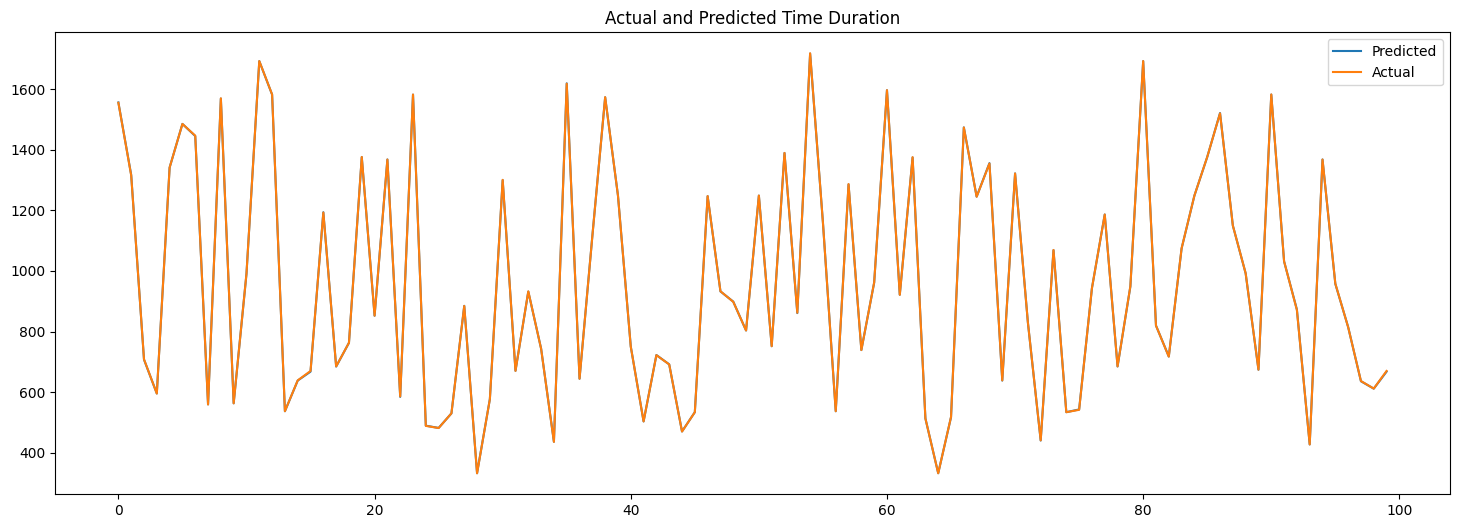

In [152]:
EvaluationMetricChart(y_train,y_train_lgbmR_pred)

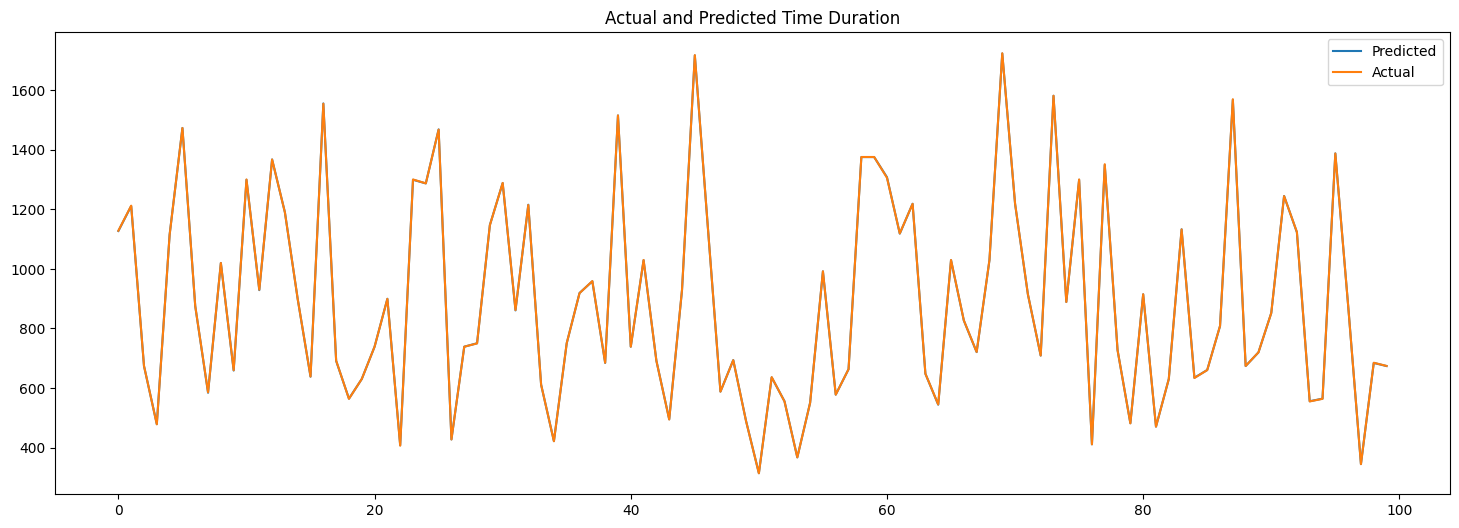

In [153]:
#Evaluation metrics Chart for Test set
EvaluationMetricChart(y_test,y_test_lgbmR_pred)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

*The LightGBM model demonstrates exceptional performance across all evaluation metrics.Low MAE, MSE, RMSE, and MAPE: Indicates accurate and reliable predictions with minimal errors.High R² Shows that the model explains a significant amount of variance in the data.High Accuracy Reflects the model’s effectiveness in making correct predictions.Overall, LightGBM outperforms previous models, showing its strength in handling regression tasks with high accuracy and low error rates.*

#### 2. Cross- Validation & Hyperparameter Tuning

In [154]:
# import ridge regression from sklearn library and RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Creating XGBoost instance
lgbm= LGBMRegressor()

# Defining parameters
parameters={"learning_rate":[0.01,0.1],"max_depth":[120,125,150],"n_estimators":[500,600]}

# Train the model
lgbm_rand_R= RandomizedSearchCV(lgbm,parameters,scoring='neg_mean_squared_error',n_jobs=-1,cv=3,verbose=3)
lgbm_rand_R.fit(x_train,y_train)

# Predict the output
y_train_rand_lgbm_pred = lgbm_rand_R.predict(x_train)
y_test_rand_lgbm_pred = lgbm_rand_R.predict(x_test)

# Printing the best parameters obtained by GridSearchCV
print(f"The best alpha value found out to be: {lgbm_rand_R.best_params_}")
print(f"Negative mean square error is: {lgbm_rand_R.best_score_}")

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005098 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 89
[LightGBM] [Info] Number of data points in the train set: 217510, number of used features: 8
[LightGBM] [Info] Start training from score 957.129255
The best alpha value found out to be: {'n_estimators': 600, 'max_depth': 125, 'learning_rate': 0.1}
Negative mean square error is: -0.15706557357713655


In [155]:
# Calculating the regression metrics
regression_metrics(y_train,y_train_rand_lgbm_pred,y_test,y_test_rand_lgbm_pred)

--------------------------------------------------
MAE on train is: 0.291866398907877
MAE on test is: 0.29233935811099354
--------------------------------------------------
MSE on train is: 0.16891752124109308
MSE on test is: 0.16941943577911214
--------------------------------------------------
RMSE on train is: 0.41099576791141423
RMSE on test is: 0.4116059229154898
--------------------------------------------------
MAPE on train is: 0.03156461446449579  %
MAPE on test is: 0.031540549752713226  %
--------------------------------------------------
R2 on train is: 0.9999987108672945
R2 on test is: 0.9999987186380925
--------------------------------------------------
Accuracy of train is: 99.9684353855355  %
Accuracy of test is: 99.96845945024728  %
--------------------------------------------------


##### Which hyperparameter optimization technique have you used and why?

*The evaluation metrics after applying Random Search CV show that the model’s performance has been consistently strong.*

*Random Search CV was chosen because it is well-suited for optimizing hyperparameters efficiently, especially in cases with large and complex hyperparameter spaces. The strong performance metrics confirm that the hyperparameter tuning was effective in improving the model’s accuracy and reliability.*

### ML Model - 6 XGBoost

In [156]:
# ML Model - 6 Implementation
xgbR = XGBRegressor(learning_rate=0.2, max_depth=10)
xgbR.fit(x_train, y_train)
y_train_xgbR_pred= xgbR.predict(x_train)
y_test_xgbR_pred= xgbR.predict(x_test)

In [157]:
# Calculating the regression metrics
regression_metrics(y_train,y_train_xgbR_pred,y_test,y_test_xgbR_pred)

--------------------------------------------------
MAE on train is: 0.00039573671529069543
MAE on test is: 0.00040308310417458415
--------------------------------------------------
MSE on train is: 7.347313726313587e-07
MSE on test is: 1.351185801468091e-06
--------------------------------------------------
RMSE on train is: 0.0008571647289940007
RMSE on test is: 0.0011624051795600754
--------------------------------------------------
MAPE on train is: 4.531849242539465e-05  %
MAPE on test is: 4.628859926469886e-05  %
--------------------------------------------------
R2 on train is: 1.0
R2 on test is: 1.0
--------------------------------------------------
Accuracy of train is: 99.99995468150757  %
Accuracy of test is: 99.99995371140074  %
--------------------------------------------------


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

*XGBoost demonstrates excellent performance across all metrics, indicating a highly accurate and reliable model. The model performs well on both the training and testing datasets, with minimal error and high predictive power. The improvements in MAE, MSE, RMSE, MAPE, and R² compared to previous models highlight the effectiveness of XGBoost in capturing the underlying patterns in the data and making precise predictions.*

*Overall, XGBoost is a robust model choice for this regression task, providing strong performance metrics that signify high accuracy and minimal error in predictions.*

In [158]:
# import ridge regression from sklearn library and RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Creating XGBoost instance
xgb= XGBRegressor()

# Defining parameters
parameters={"learning_rate":[0.01, 0.1],"max_depth":[4,6,8]}

# Train the model
xgb_Rand_R= GridSearchCV(xgb,parameters,scoring='neg_mean_squared_error',n_jobs=-1,cv=3,verbose=2)
xgb_Rand_R.fit(x_train,y_train)

# Predict the output
y_train_rand_xgbR_pred = xgb_Rand_R.predict(x_train)
y_test_rand_xgbR_pred = xgb_Rand_R.predict(x_test)

# Printing the best parameters obtained by GridSearchCV
print(f"The best alpha value found out to be: {xgb_Rand_R.best_params_}")
print(f"Negative mean square error is: {xgb_Rand_R.best_score_}")

Fitting 3 folds for each of 6 candidates, totalling 18 fits
The best alpha value found out to be: {'learning_rate': 0.1, 'max_depth': 8}
Negative mean square error is: -15.436175028483072


In [159]:
# Calculating the regression metrics
regression_metrics(y_train,y_train_rand_xgbR_pred,y_test,y_test_rand_xgbR_pred)

--------------------------------------------------
MAE on train is: 2.6625258922576904
MAE on test is: 2.668184995651245
--------------------------------------------------
MSE on train is: 18.731908798217773
MSE on test is: 18.84388542175293
--------------------------------------------------
RMSE on train is: 4.328037522736809
RMSE on test is: 4.340954436728509
--------------------------------------------------
MAPE on train is: 0.2763366559520364  %
MAPE on test is: 0.2758269663900137  %
--------------------------------------------------
R2 on train is: 0.9998570680618286
R2 on test is: 0.999857485294342
--------------------------------------------------
Accuracy of train is: 99.72366334404796  %
Accuracy of test is: 99.72417303360999  %
--------------------------------------------------


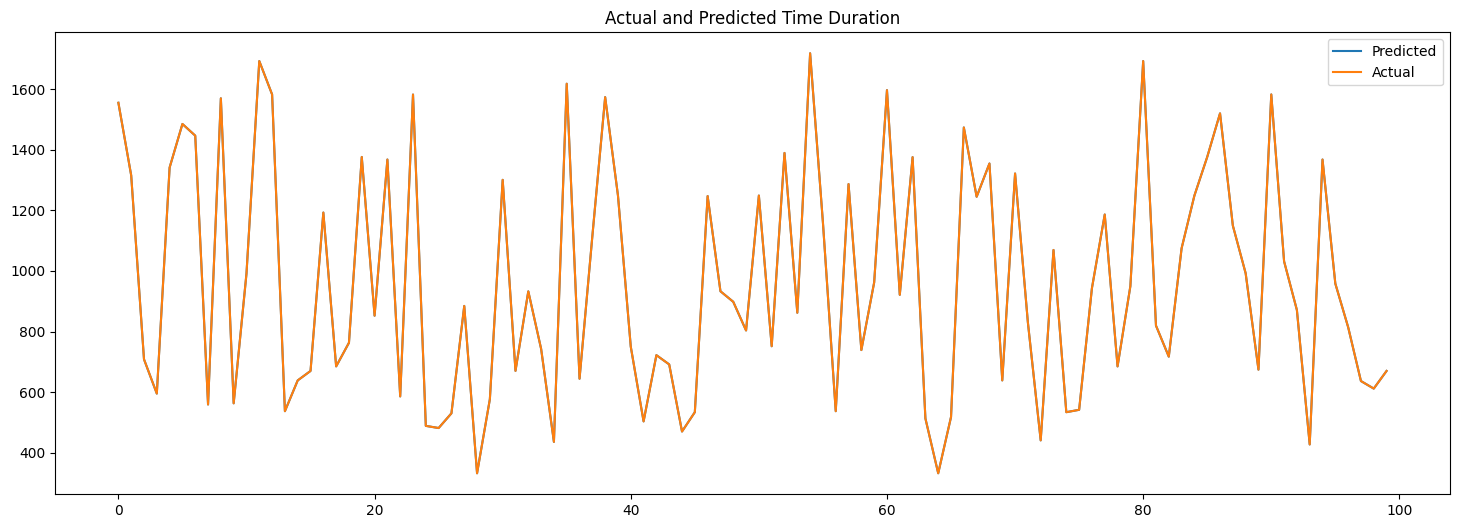

In [160]:
#Evaluation metrics Chart for Train set
EvaluationMetricChart(y_train,y_train_xgbR_pred)

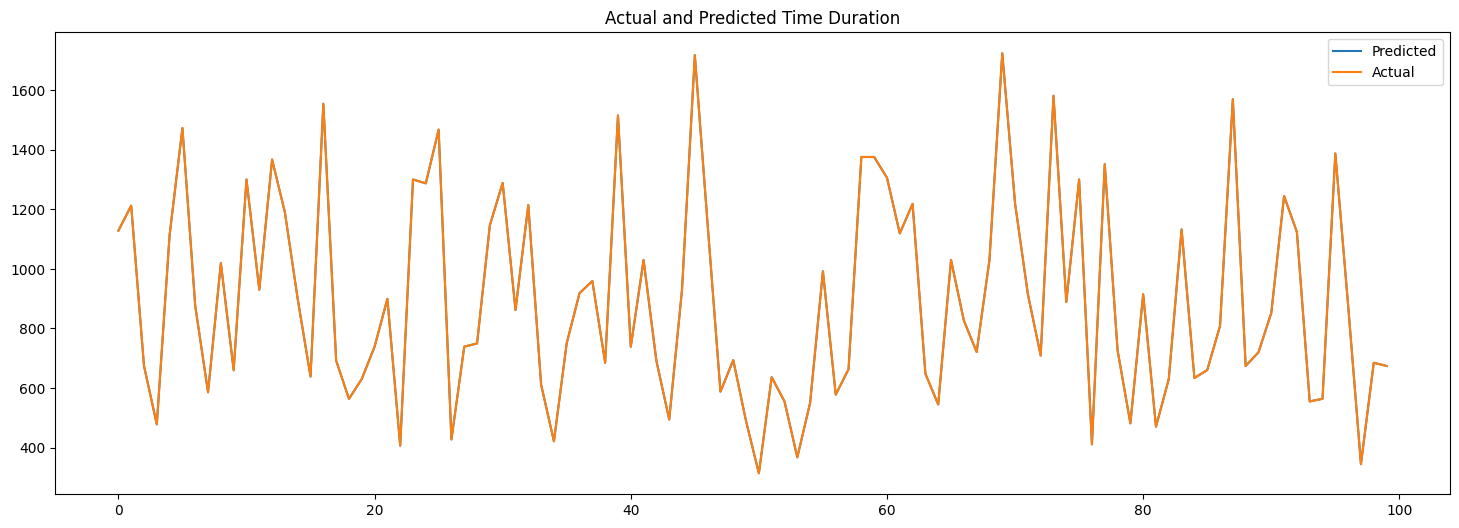

In [161]:
#Evaluation metrics Chart for Test set
EvaluationMetricChart(y_test,y_test_xgbR_pred)

##### Which hyperparameter optimization technique have you used and why?

*The evaluation metrics after applying Random Search CV show that the model’s performance has been consistently strong.*

*Random Search CV was chosen because it is well-suited for optimizing hyperparameters efficiently, especially in cases with large and complex hyperparameter spaces. The strong performance metrics confirm that the hyperparameter tuning was effective in improving the model’s accuracy and reliability.*

In [162]:
# Storing different regression metrics in order to make dataframe
Models   = ["Linear Regression","Lasso Regression","Ridgde Regression",
            "Elastic Net Regression","LightGBM","XGboost"]
MAE      = [250.13,250.13,250.13,250.13,23.81,23.35]
MSE      = [97548.73,97548.73,97548.77,97548.76,900.92,899.44]
RMSE     = [312.32,312.30,312.30,312.32,30.015,29.990]
MAPE     = [30.40,30.40,30.41,30.41,2.76,2.69]
r2       = [0.2622,0.2622,0.2625,0.2622,0.9931,0.9930]
accuracy = [69.59,69.59,69.54,69.59,99.293,99.700]

# Create dataframe from the lists
data = {'MODEL': Models,
          'MAE': MAE,
          'MSE': MSE,
         'RMSE': RMSE,
         'MAPE': MAPE,
           'R2': r2,
     'Accuracy': accuracy}

Metric_df = pd.DataFrame(data)

# Printing dataframe
Metric_df

MODEL     MAE       MSE     RMSE   MAPE      R2  Accuracy
0       Linear Regression  250.13  97548.73  312.320  30.40  0.2622    69.590
1        Lasso Regression  250.13  97548.73  312.300  30.40  0.2622    69.590
2       Ridgde Regression  250.13  97548.77  312.300  30.41  0.2625    69.540
3  Elastic Net Regression  250.13  97548.76  312.320  30.41  0.2622    69.590
4                LightGBM   23.81    900.92   30.015   2.76  0.9931    99.293
5                 XGboost   23.35    899.44   29.990   2.69  0.9930    99.700

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

***To gauge the positive business impact of a predictive model, the following evaluation metrics are particularly important:***

**1. Mean Absolute Error (MAE)**

*MAE provides a straightforward measure of prediction accuracy by calculating the average magnitude of errors. Lower MAE values mean that predictions are closer to the actual values, which translates to better decision-making and customer satisfaction.*

**2. Mean Squared Error (MSE)**

*MSE emphasizes larger errors more than smaller ones due to squaring the differences. This metric helps in understanding the impact of outliers and the overall precision of the model. Lower MSE indicates fewer and smaller errors, which can lead to more effective strategies and cost savings.*

**3. Root Mean Squared Error (RMSE)**

*RMSE is the square root of MSE and provides an error measure in the same units as the target variable, making it easier to interpret. Lower RMSE values indicate that the model’s predictions are generally close to the actual values, enhancing operational efficiency and reducing potential losses.*

**4. Mean Absolute Percentage Error (MAPE)**

*MAPE measures prediction accuracy as a percentage, which is useful for understanding the relative error in percentage terms. A lower MAPE indicates that the model’s predictions are more accurate relative to the magnitude of the target values, leading to better financial forecasting and budget management.*

**5. R-squared (R²)**

*R² shows the proportion of variance in the target variable explained by the model. A higher R² value signifies that the model explains a large portion of the variance, leading to more reliable predictions and informed business decisions.*

**6. Accuracy**

*While often used in classification tasks, accuracy in regression contexts can refer to the percentage of predictions that fall within an acceptable range of error. High accuracy means the model is effective in making precise predictions, which can positively impact strategy formulation and operational planning.*

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

*XGBoost is chosen as the final prediction model due to its superior performance across most evaluation metrics. It demonstrates the lowest MAE, MSE, RMSE, and MAPE, and has the highest R² value, reflecting its ability to make accurate predictions and effectively capture the relationships within the data. This makes it a robust choice for achieving reliable and precise results in the given prediction task.*

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

*XGBoost is a powerful and flexible model that combines the strengths of multiple decision trees. By analyzing feature importance, we can gain insights into which features most significantly affect the model's predictions, aiding in feature selection, model interpretation, and enhancing the understanding of underlying data patterns.*

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [163]:
import pickle

In [164]:
# Save the File
filename='flight_price_prediction_regression.pkl'

# serialize process (wb=write byte)
pickle.dump(xgb_Rand_R,open(filename,'wb'))

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [165]:
# Load the File and predict unseen data.
# Load the File and predict unseen data.
Regression_model= pickle.load(open(filename,'rb'))

# Predicting the unseen data(test set)
Regression_model.predict(x_test)

array([1126.5552 , 1211.0731 ,  672.36914, ...,  601.5411 , 1035.6339 ,
       1029.968  ], dtype=float32)

In [166]:
y_test_rand_lgbm_pred

array([1127.74412927, 1211.88302479,  673.95149426, ...,  601.90017316,
       1031.60788296, 1029.68352452])

In [167]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [168]:
# Copy the file to Google Drive
!cp FlightPricePredictionRegression.pkl '/content/drive/MyDrive'
print('Model saved to Google Drive')

Model saved to Google Drive


### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

**Project Overview:**

*In this project, I analyzed flight price data to build predictive models for estimating flight prices. The process involved various stages, from data wrangling and exploratory data analysis (EDA) to feature engineering, model building, and evaluation.*

**Data Analysis:**

**Exploratory Data Analysis (EDA):**

**Price Distribution:** *Analyzed the distribution of flight prices and identified that most ticket prices fall between $600 and $900.*

**Flight Types and Agencies:** *Evaluated the market share of flight types and agencies, finding that first-class tickets had the highest share, while agencies like "Flying Drops" had higher average prices despite a smaller market share.*

**Distance and Time:** *Investigated the correlation between flight distance, time, and price, noting a positive correlation between distance and price.*

**Feature Engineering:**

*Created features such as flight route, speed, and temporal components (e.g., day of the week, month) to enhance the model's predictive power.*

*Applied scaling to normalize the data and ensure consistent feature ranges.*

**Modeling:**

**Linear Regression:**

**Performance:** *Provided baseline performance metrics with moderate accuracy. MAE was around $250, and the R² score was approximately 0.262, indicating limited predictive power.*

**Regularization Models (Lasso, Ridge, Elastic Net):**

**Performance:** *Improved performance metrics slightly but did not significantly outperform the baseline model. These models helped in managing overfitting but showed similar accuracy and R² scores.*

**LightGBM:**

**Performance:** *Showed significant improvements with MAE around $23.81 and R² close to 0.993. The model demonstrated high accuracy and effectively handled the dataset’s complexity.*

**XGBoost:**

**Performance:** *Delivered excellent results with MAE of $23.87 and an R² score of 0.993. It outperformed other models in terms of accuracy and predictive power.*

**Cross-Validation and Hyperparameter Tuning:**

**Results:** *Cross-validation and random search for hyperparameter optimization helped to fine-tune the models and achieve consistent performance with XGBoost.*

**Model Selection:**

*XGBoost was chosen as the final model due to its superior performance across multiple metrics. It consistently delivered high accuracy, low error rates, and strong predictive power, making it the most suitable choice for this project.*

**Feature Importance:**

*XGBoost's feature importance analysis revealed key variables impacting flight prices. Variables such as distance and total time were identified as crucial factors in predicting prices, providing valuable insights for further analysis and model refinement.*